# Objective
EDA-Plotting on Haberman set

Resources used: 

    Applied AI course
    (BOOK) Python for Data Analysis. Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney


# About Haberman set
Haberman's Survival Data
`https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1`

    Attribute Information:
        1. Age of patient at time of operation (numerical)
        2. Patient's year of operation (year - 1900, numerical)
        3. Number of positive axillary nodes detected (numerical)
        4. Survival status (class attribute)
            1 = the patient survived 5 years or longer
            2 = the patient died within 5 year



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset
haberman = pd.read_csv("haberman.csv")

In [2]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [3]:
#Loading first 5 column
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#mapping 1 to survived and 2 to dead

haberman['status'] = haberman['status'].map({1:"Survive", 2:"Dead"})
haberman.head()

,age,year,nodes,status
0,30,64,1,Survive
1,30,62,3,Survive
2,30,65,0,Survive
3,31,59,2,Survive
4,31,65,4,Survive


In [5]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [6]:
#(Q) How many data points for each class are present? 

haberman['status'].value_counts()

Survive    225
Dead        81
Name: status, dtype: int64

# 2-D Scatter Plot

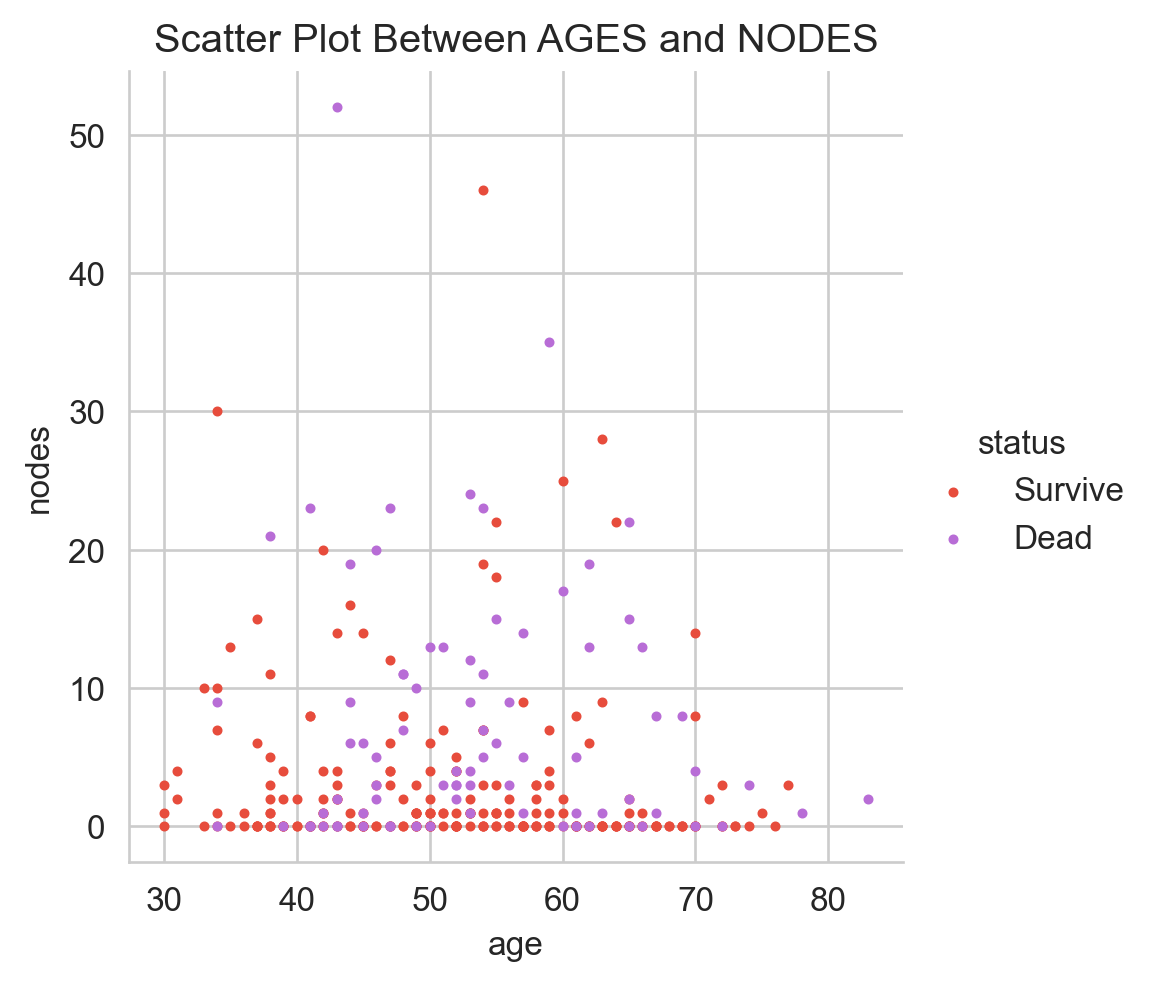

In [7]:
#2-D scatter plot:

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 4) \
    .map(plt.scatter, "age", "nodes") \
    .add_legend();
plt.title("Scatter Plot Between AGES and NODES");


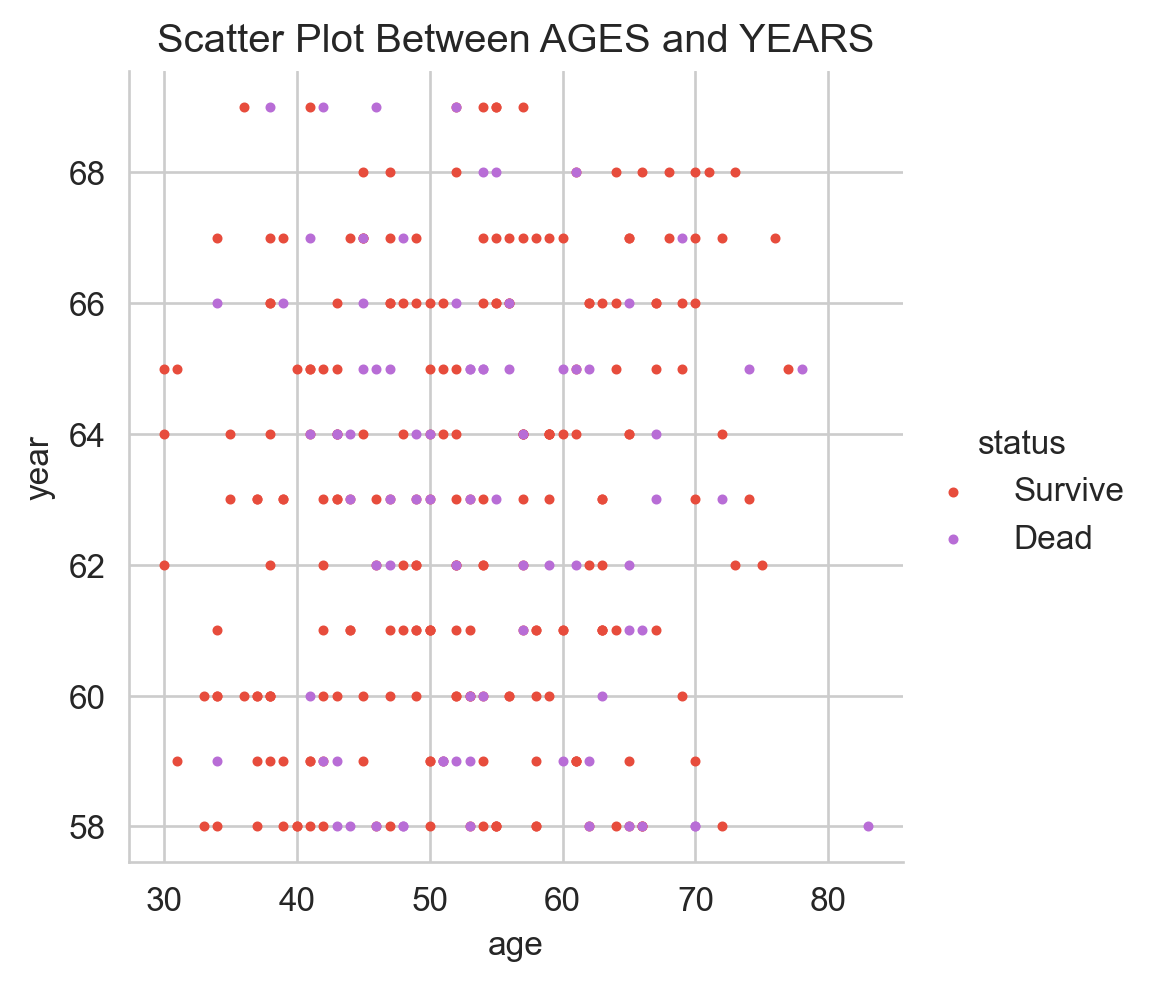

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 4) \
    .map(plt.scatter, "age", "year") \
    .add_legend();
plt.title("Scatter Plot Between AGES and YEARS");


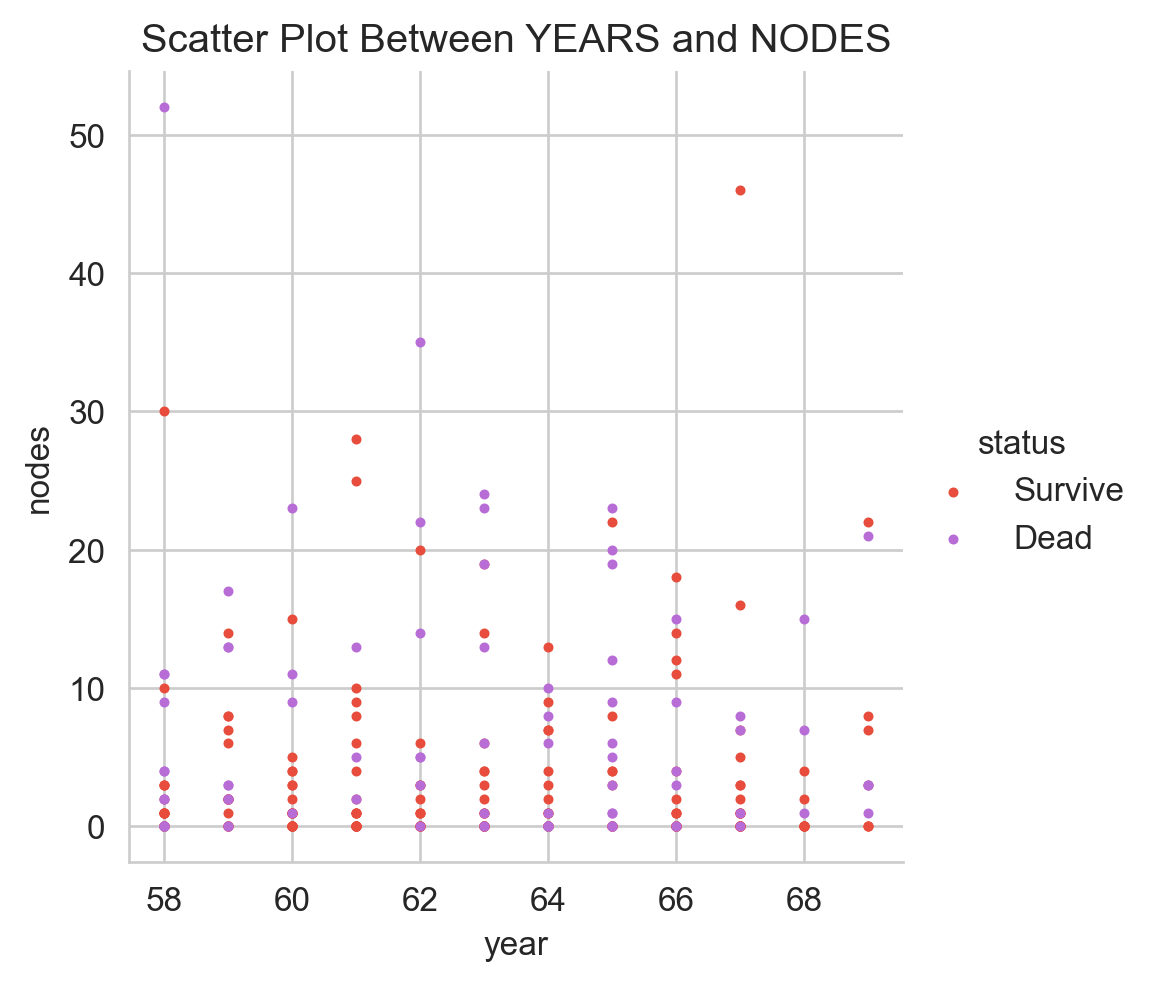

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 4) \
    .map(plt.scatter, "year", "nodes") \
    .add_legend();
plt.title("Scatter Plot Between YEARS and NODES");


**Observation(s):**
1. Cannot make much sense of it. Need further Analysis.

# Pair Plot

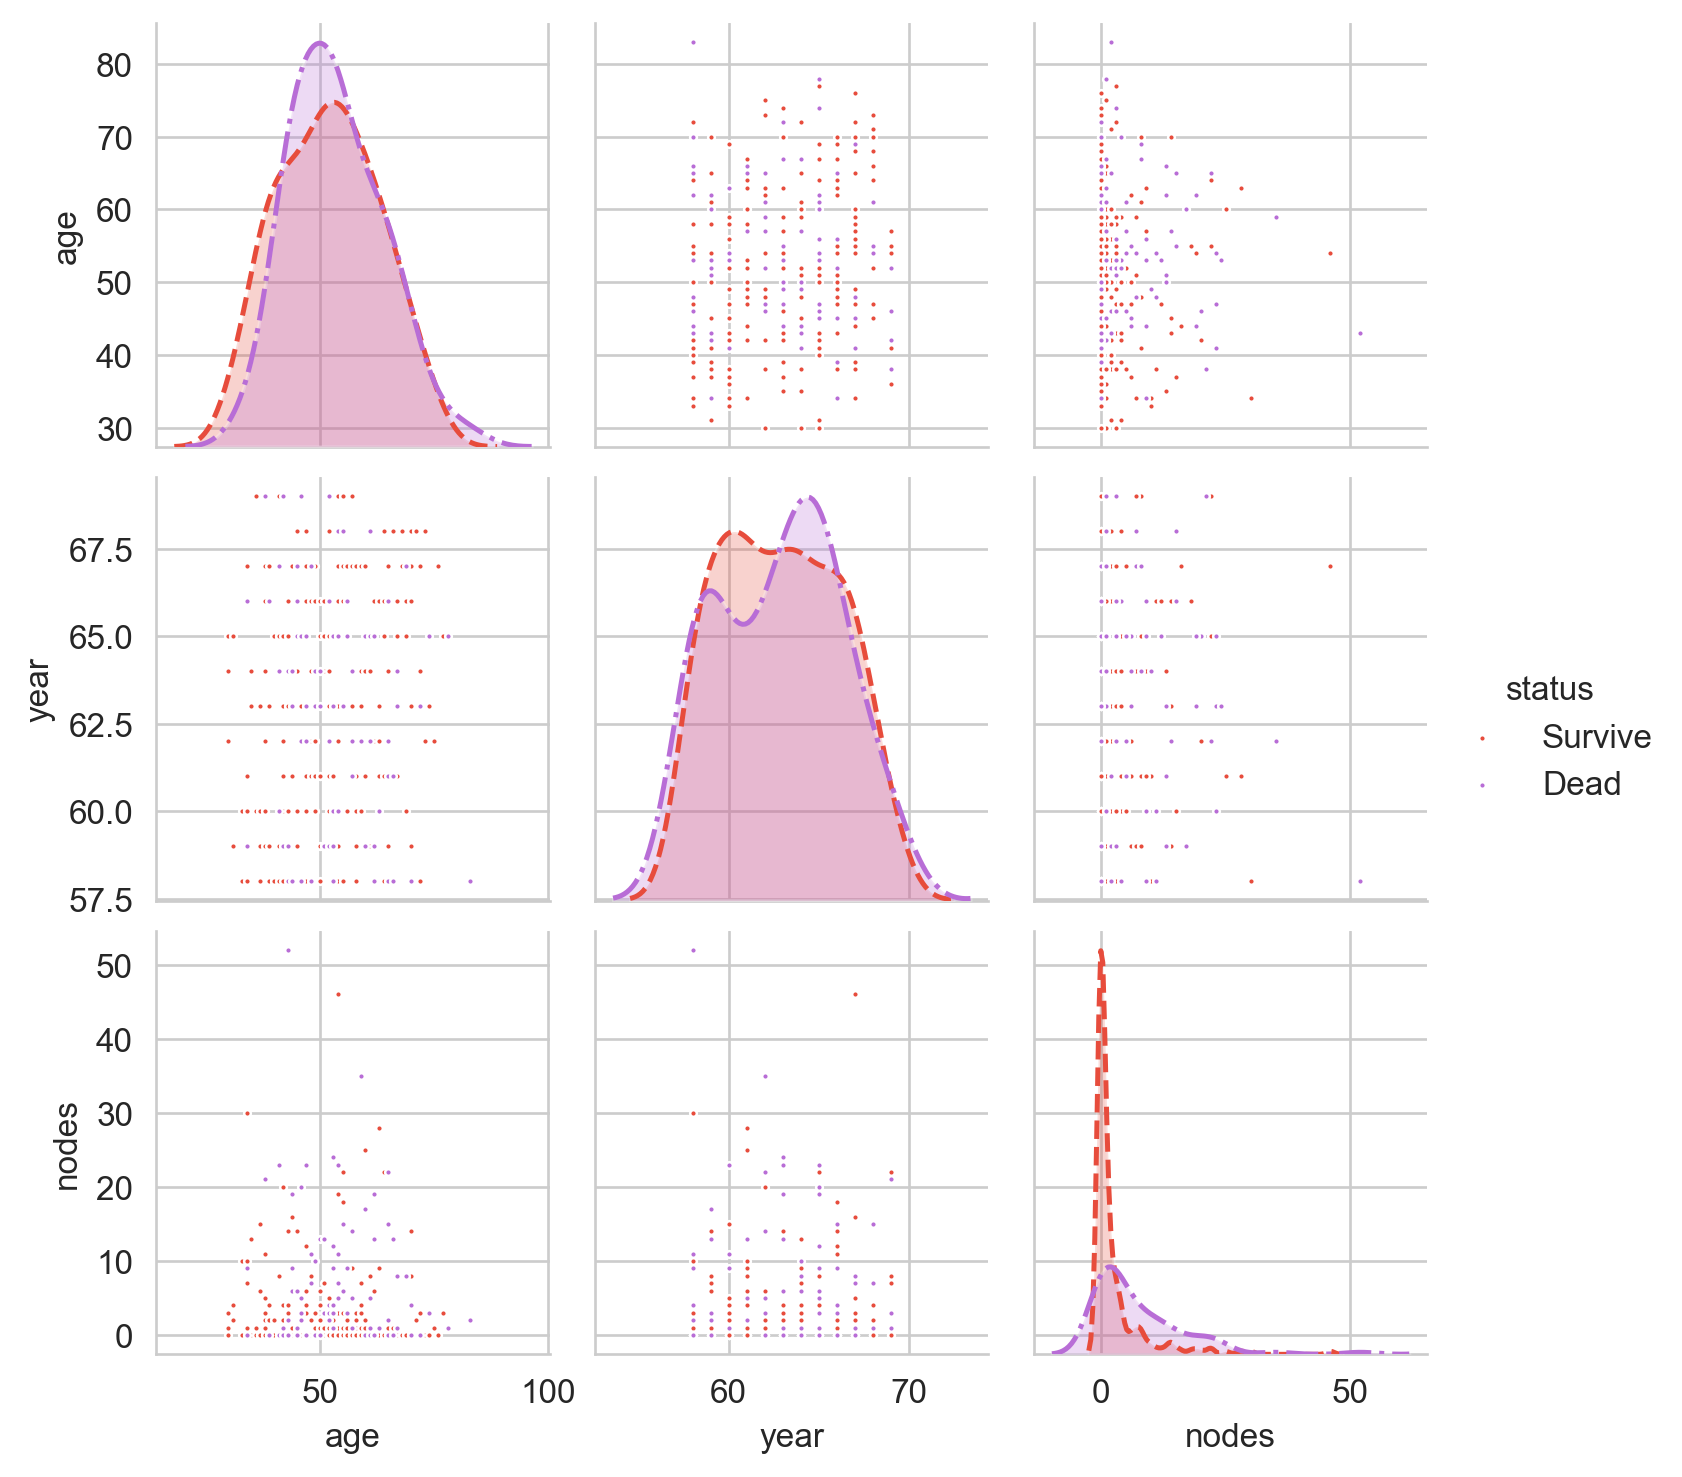

In [10]:
#Pair-Plot
# pairwise scatter plot: Pair-Plot (for visualizing combination of more than 2 variable)

sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=2)
plt.show()

**Obeservations**
1. No clear picture.
2. Though people with less nodes, seems to have more survival chances

# GroupBy Mean and Median

In [11]:
#Mean and Median

haberman.groupby("status").agg(["mean", "median"])

age              year            nodes       
              mean median       mean median      mean median
status                                                      
Dead     53.679012     53  62.827160     63  7.456790      4
Survive  52.017778     52  62.862222     63  2.791111      0

# 1-d Histogram

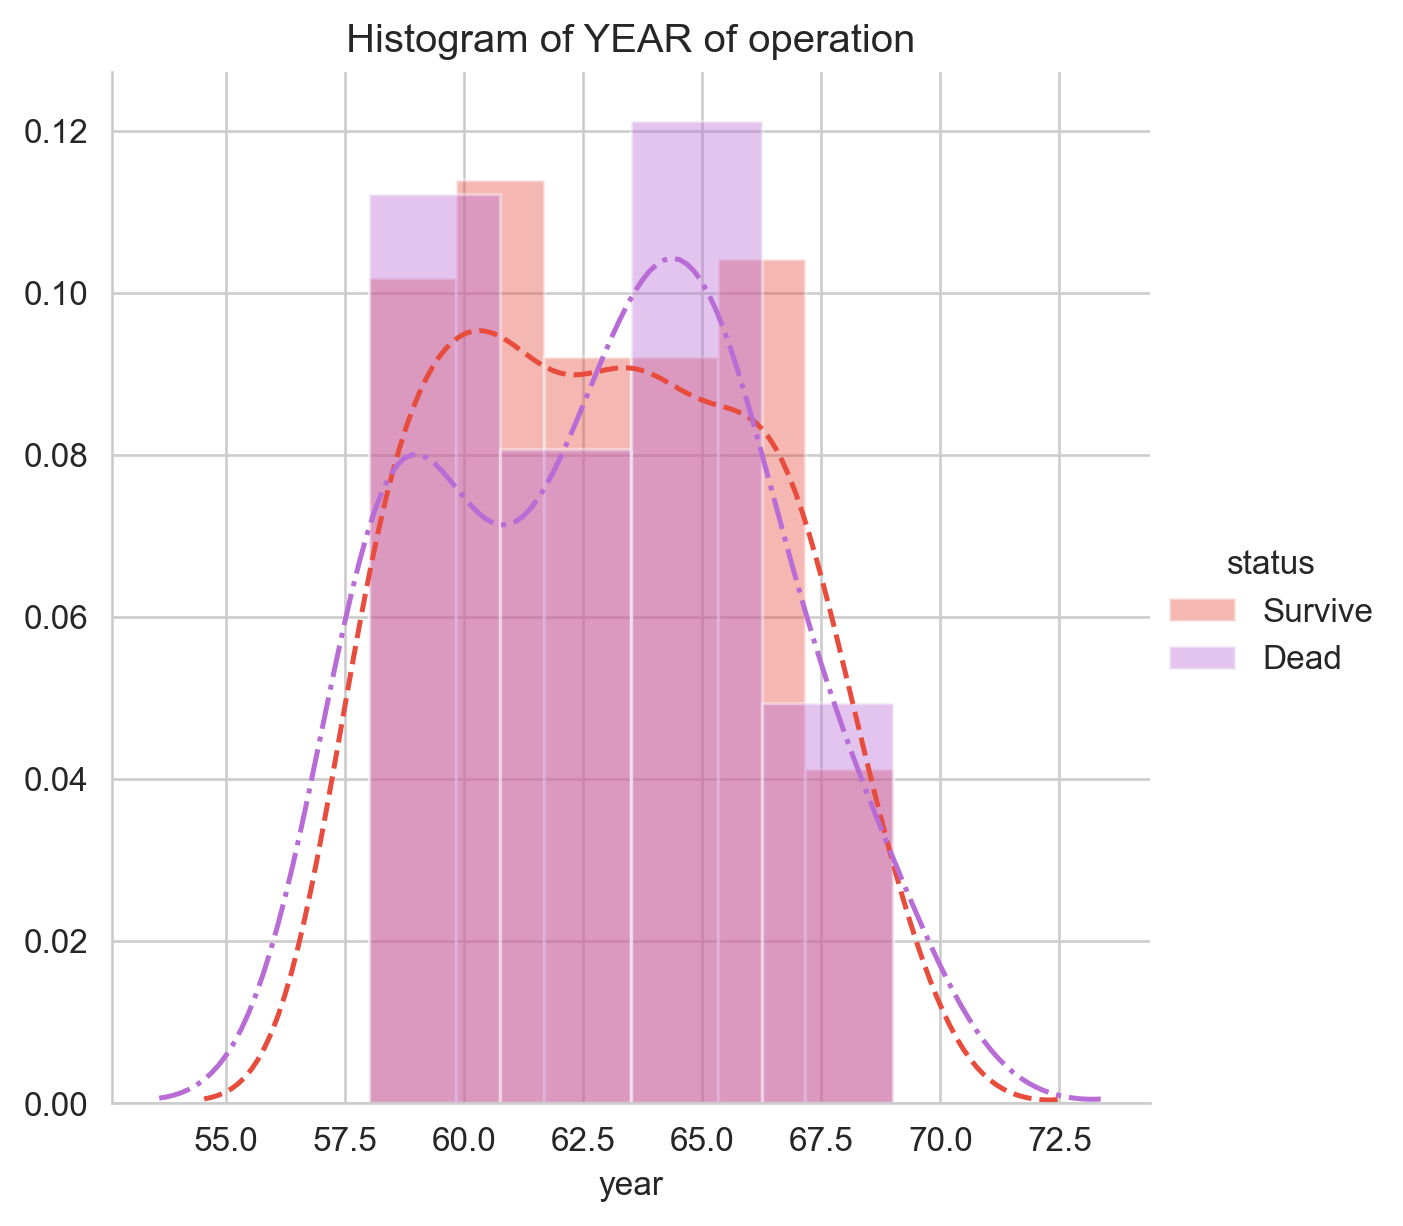

In [12]:
#Histogram

sns.FacetGrid(haberman, hue='status', height=5) \
    .map(sns.distplot, 'year') \
    .add_legend();
plt.title("Histogram of YEAR of operation")
plt.show();

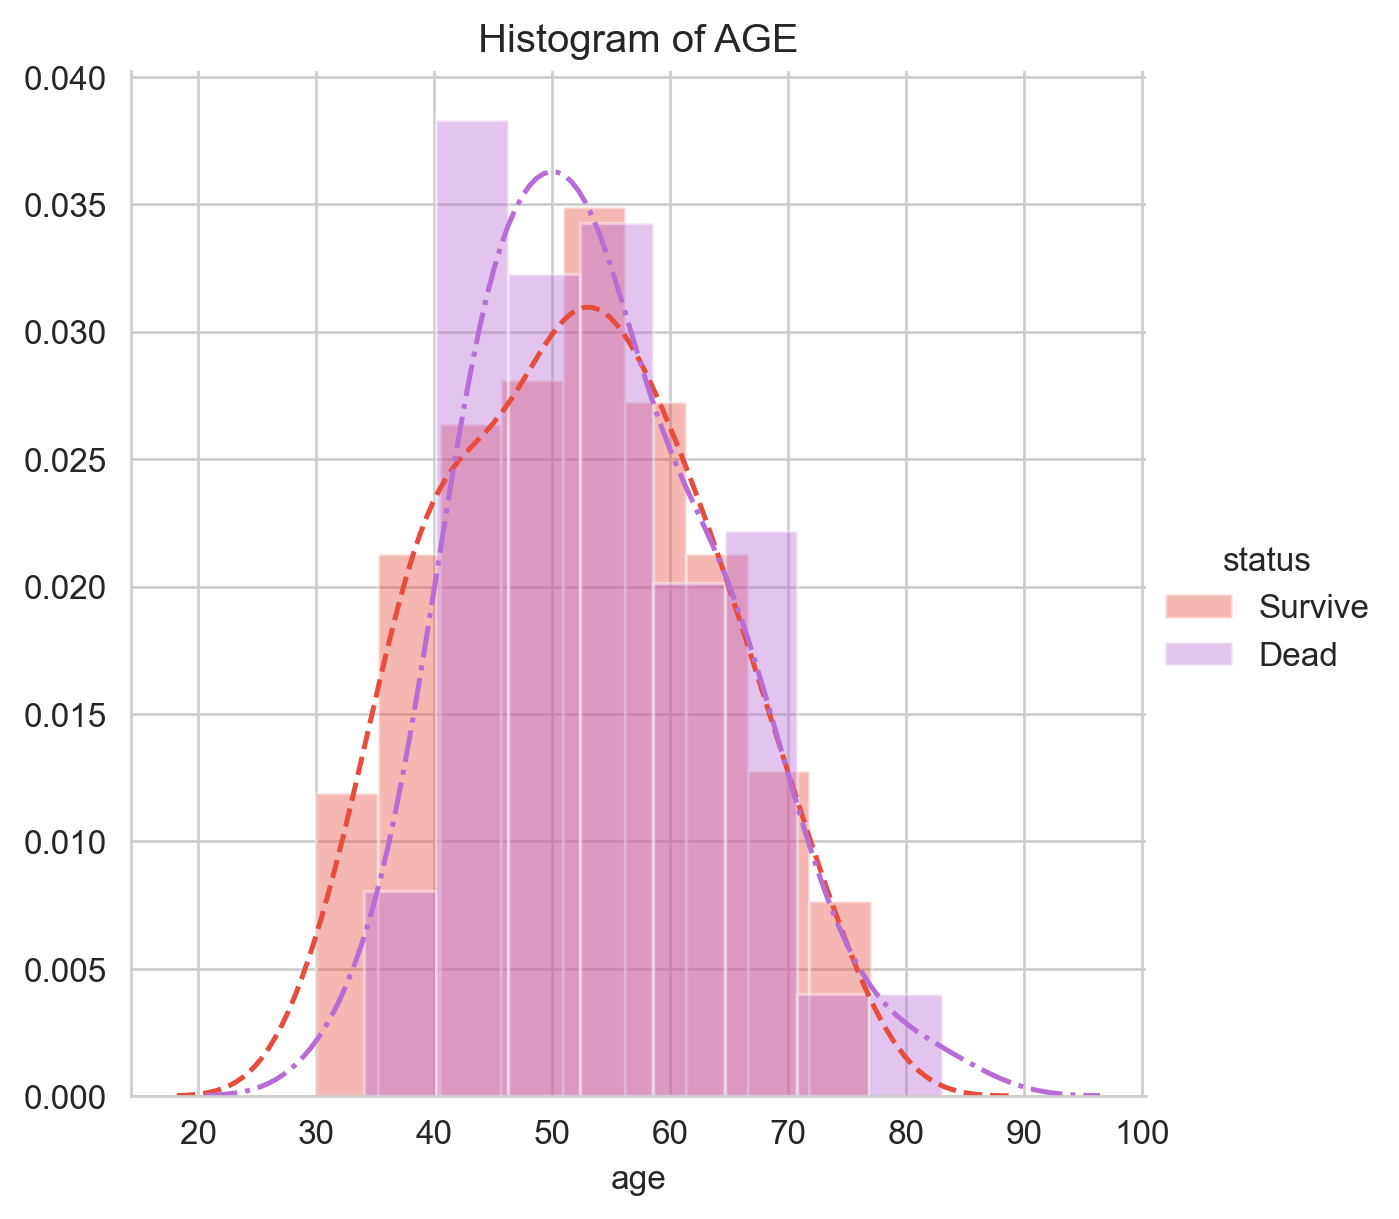

In [13]:
sns.FacetGrid(haberman, hue='status', height=5) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.title("Histogram of AGE")
plt.show();

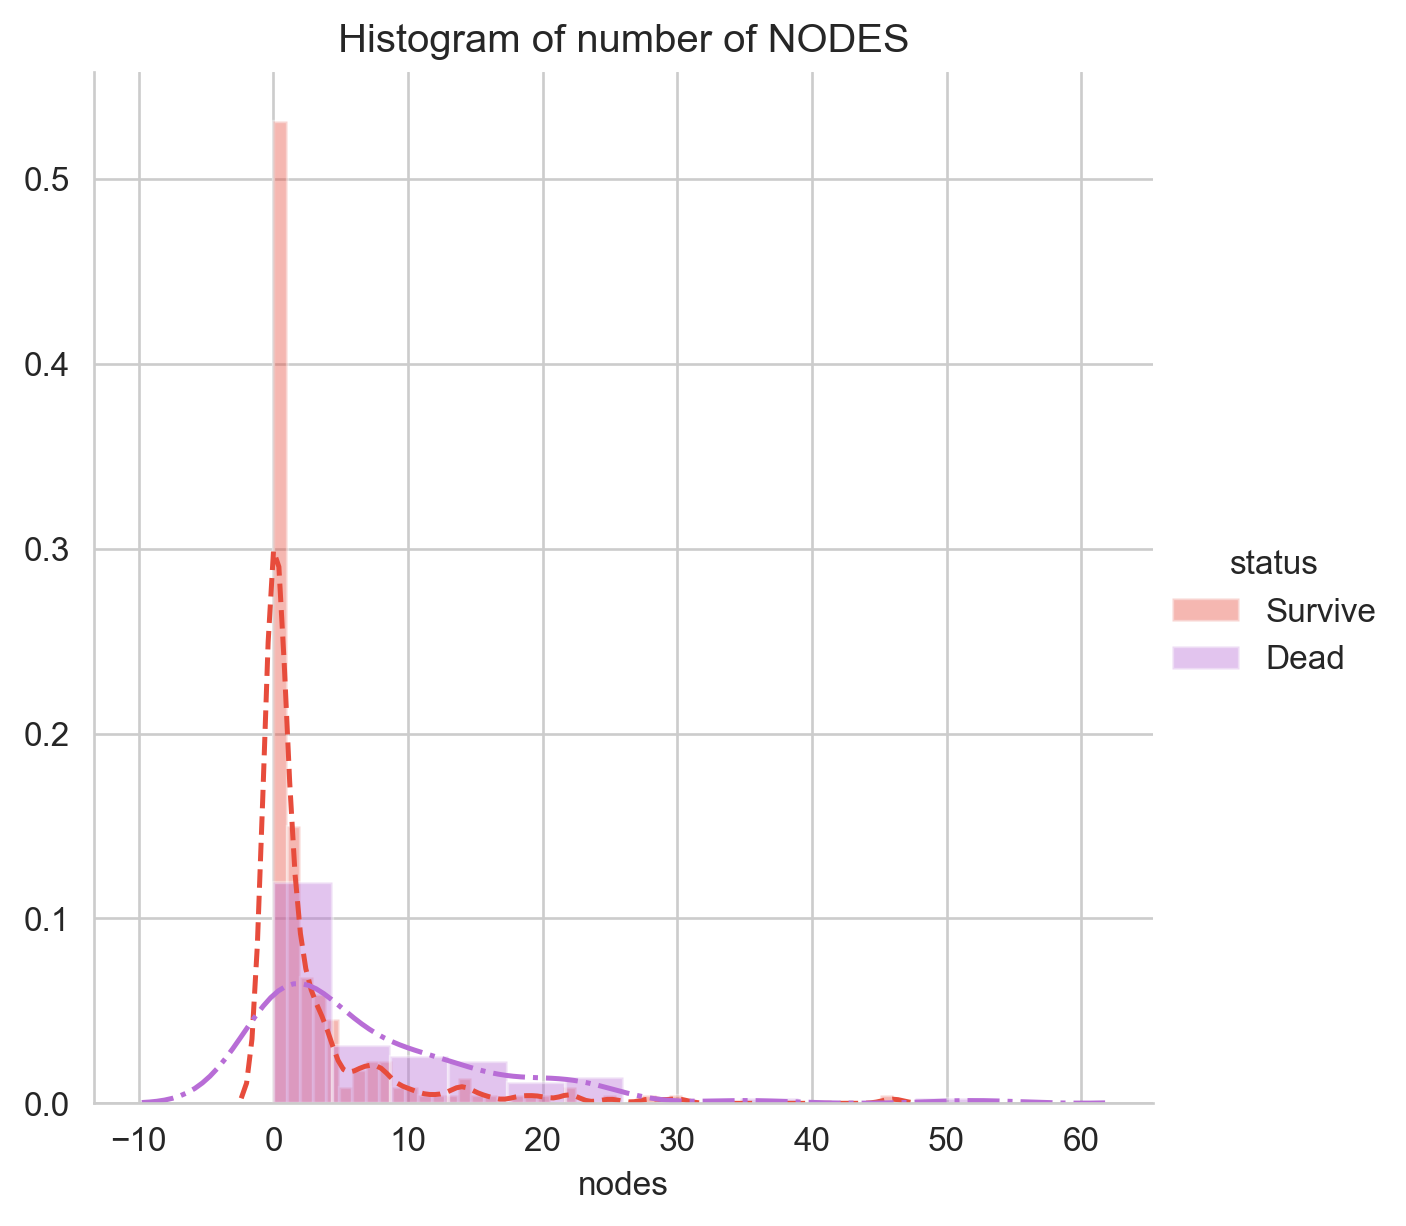

In [14]:
sns.FacetGrid(haberman, hue='status', height=5) \
    .map(sns.distplot, 'nodes') \
    .add_legend();
plt.title("Histogram of number of NODES")
plt.show();

**Obseravtion**
1. Seems to have too much overlapping to come to have a some conclusion

# Finely Binned Histogram

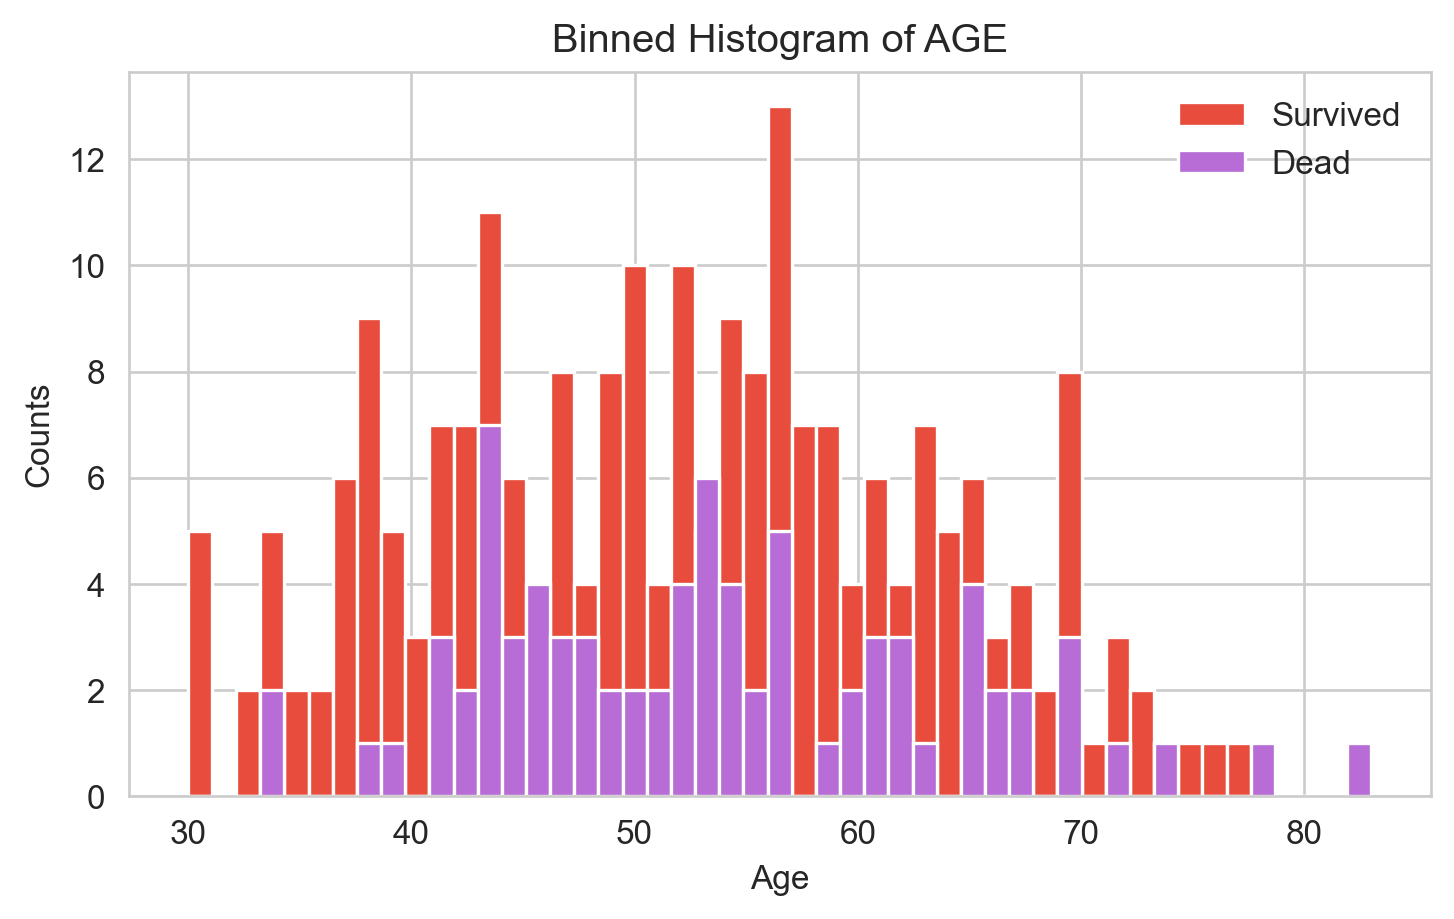

In [15]:
#So we are now going to fine-bin histogram and re-evaluate them by splitting the dataset

d1 = haberman.loc[haberman['status']=='Survive']
d2 = haberman.loc[haberman['status']=='Dead']
bins = np.linspace(min(d1['age'].min(), d2['age'].min()), max(d1['age'].max(), d2['age'].max()), 50)
counts1, _, _ = plt.hist(d1['age'], bins=bins, label="Survived")
plt.hist(d2['age'], bins=bins, label="Dead")
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Age")
plt.title("Binned Histogram of AGE");


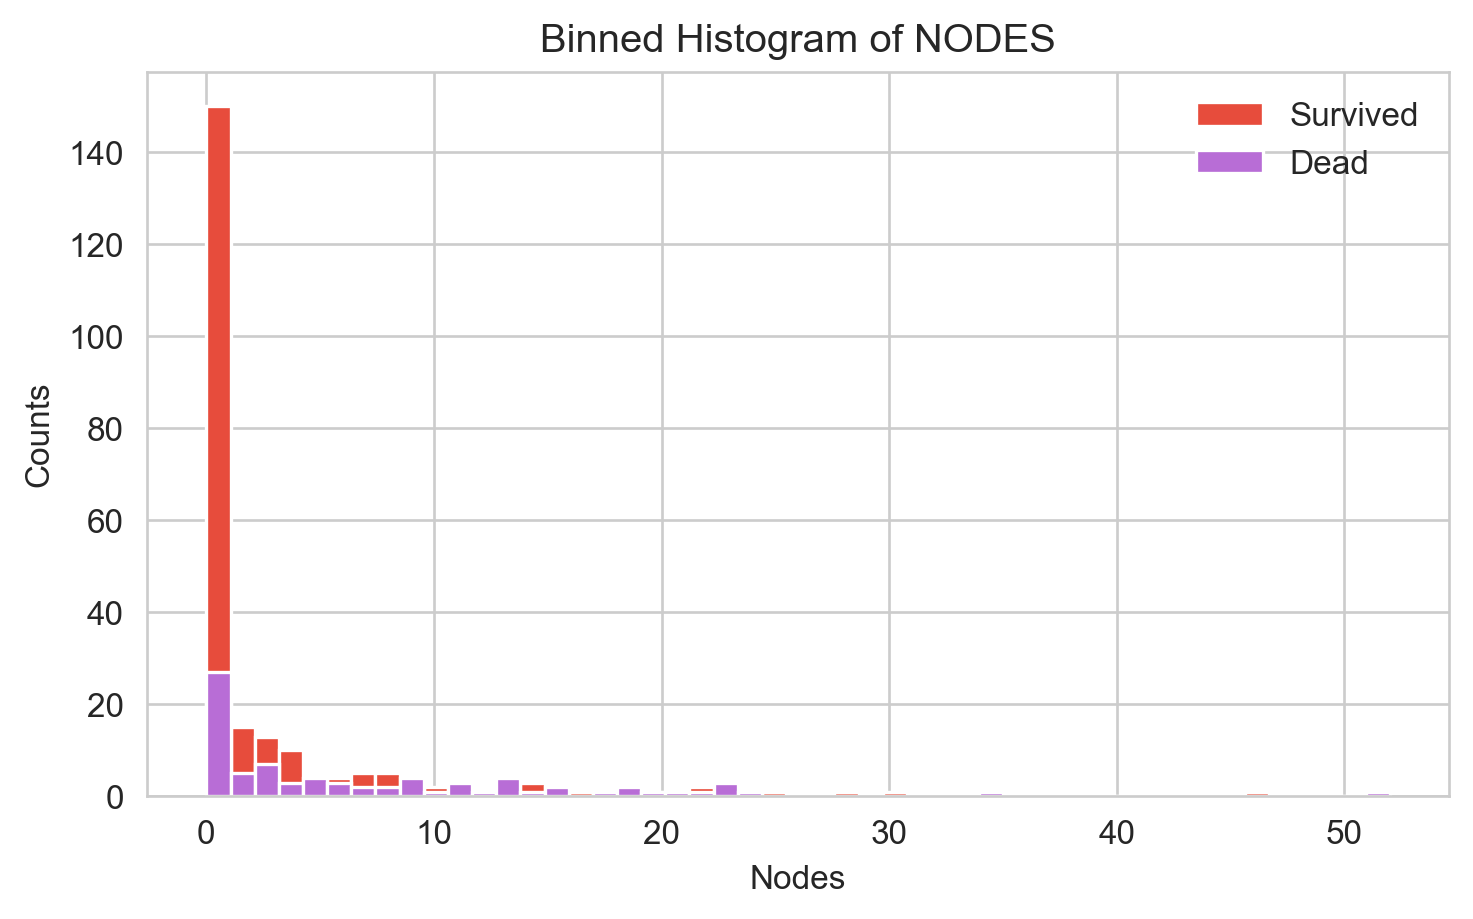

In [16]:
bins = np.linspace(min(d1['nodes'].min(), d2['nodes'].min()), max(d1['nodes'].max(), d2['nodes'].max()), 50)
counts1, _, _ = plt.hist(d1['nodes'], bins=bins, label="Survived")
plt.hist(d2['nodes'], bins=bins, label="Dead")
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Nodes")
plt.title("Binned Histogram of NODES");

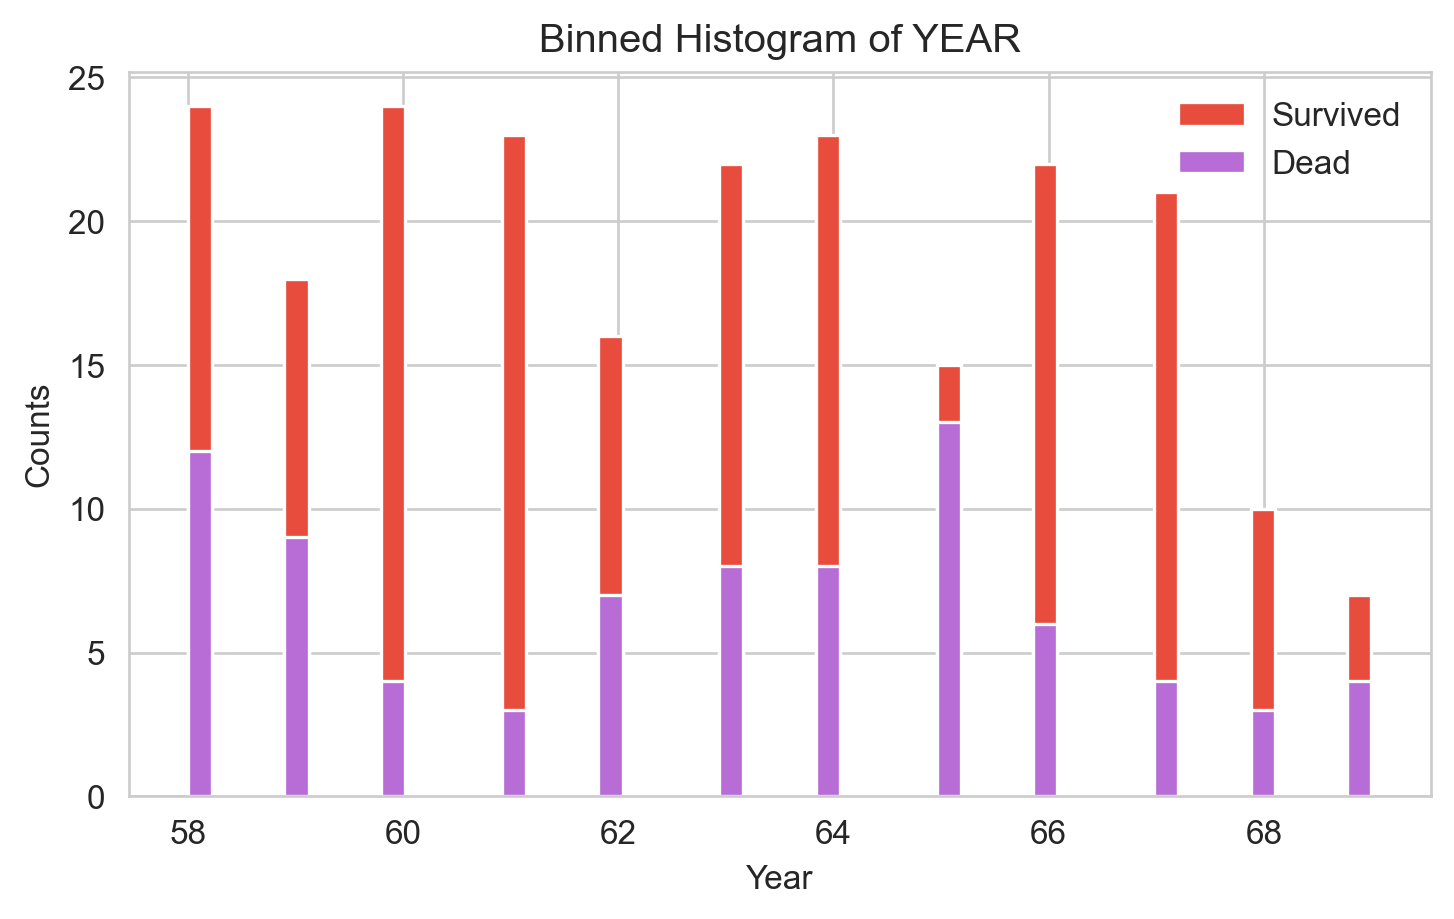

In [17]:
bins = np.linspace(min(d1['year'].min(), d2['year'].min()), max(d1['year'].max(), d2['year'].max()), 50)
counts1, _, _ = plt.hist(d1['year'], bins=bins, label="Survived")
plt.hist(d2['year'], bins=bins, label="Dead")
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Year")
plt.title("Binned Histogram of YEAR");

**Observation**
1. People with less nodes seems to survive more.

# Bee-Swarm Plot

In [18]:
#Bee-Swarm Plot

dataset = pd.DataFrame({
    "value": np.concatenate((d1['nodes'], d2['nodes'])),
    "type": np.concatenate((np.ones(d1['status'].shape), np.zeros(d2['status'].shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   306 non-null    int64  
 1   type    306 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


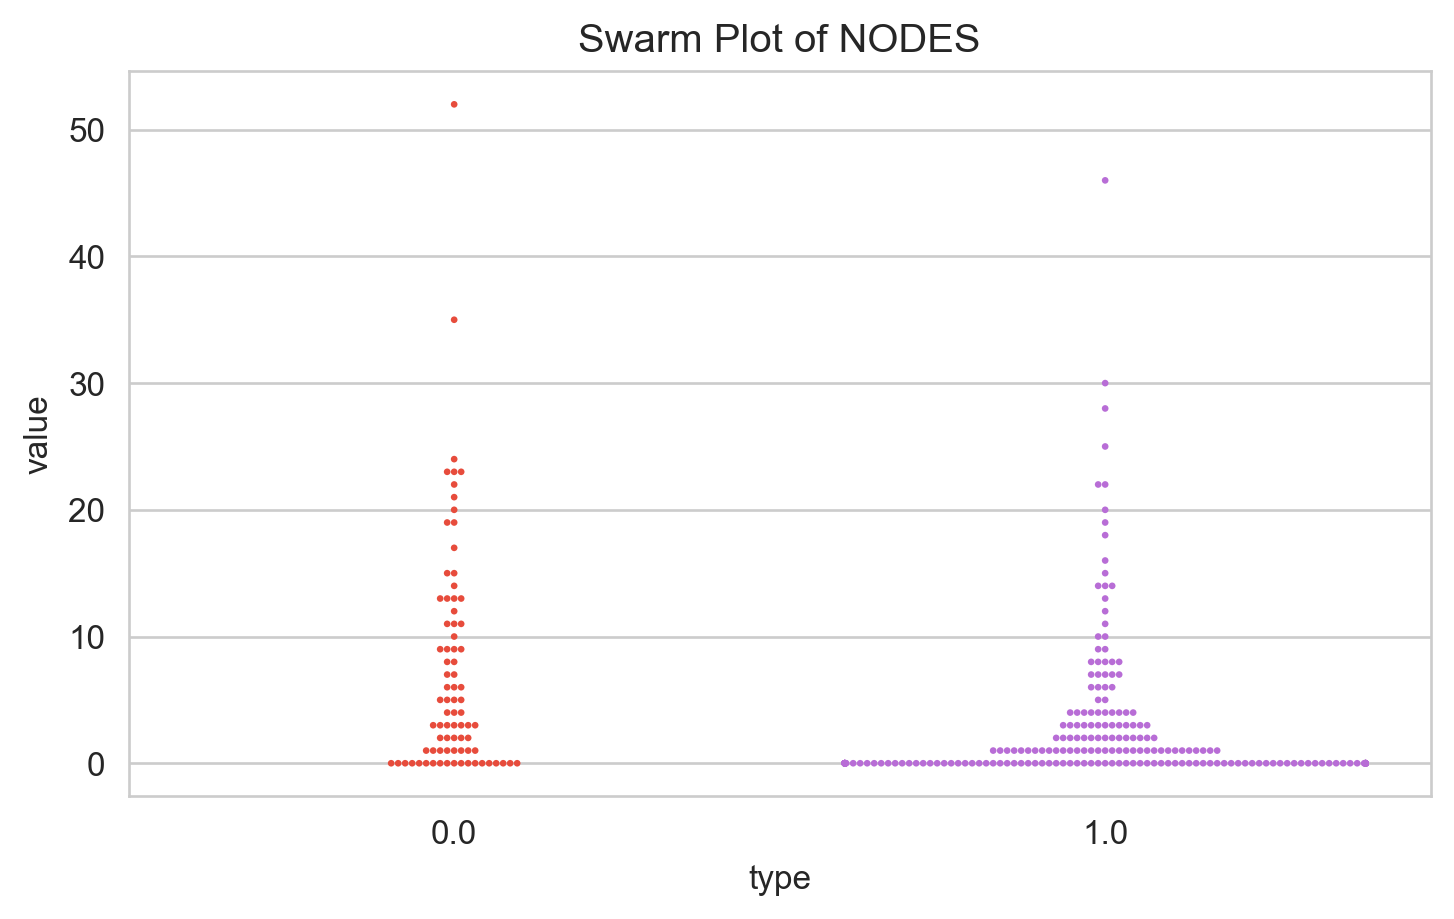

In [19]:
sns.swarmplot(x="type", y="value", data=dataset, size=2);
plt.title("Swarm Plot of NODES");

# Box-Plot
    Red = Dead
    Voilet = Survived

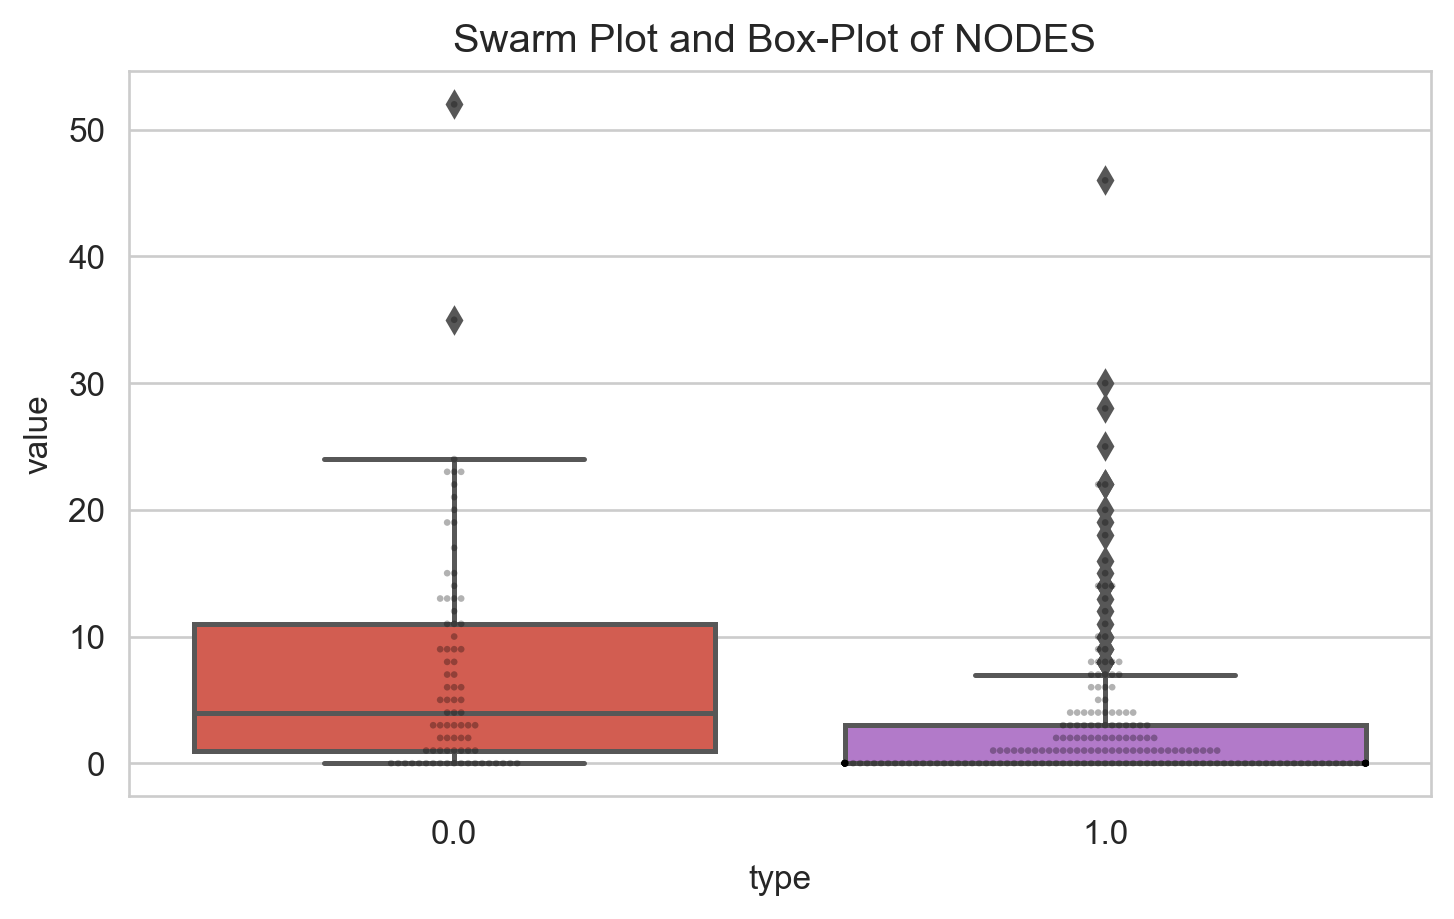

In [20]:
sns.boxplot(x="type", y="value", data=dataset);
sns.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);
plt.title("Swarm Plot and Box-Plot of NODES ");

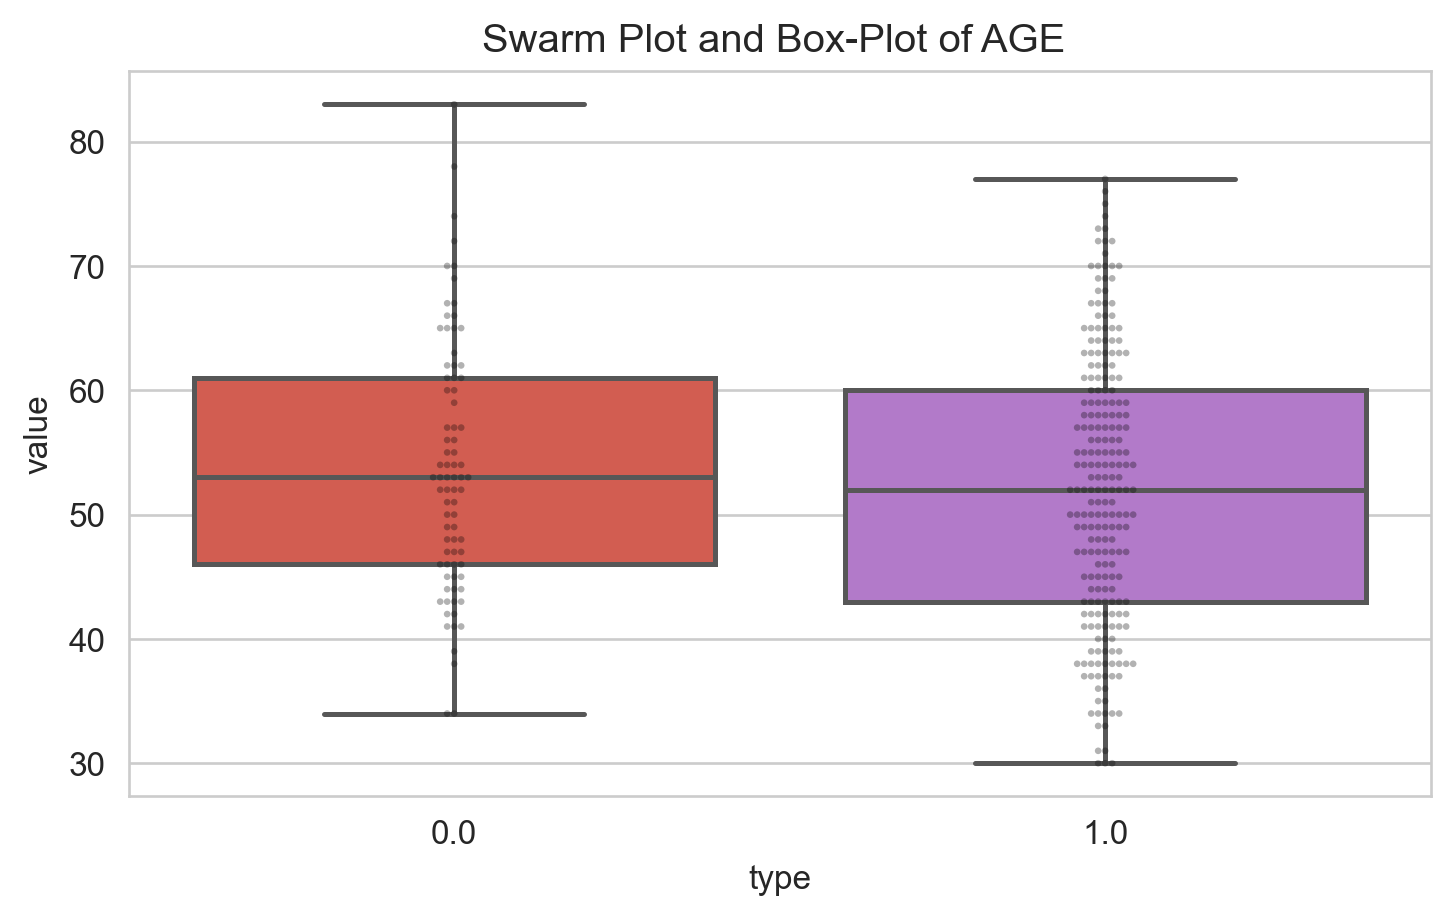

In [21]:
dataset_2 = pd.DataFrame({
    "value": np.concatenate((d1['age'], d2['age'])),
    "type": np.concatenate((np.ones(d1['status'].shape), np.zeros(d2['status'].shape)))
})
sns.boxplot(x="type", y="value", data=dataset_2);
sns.swarmplot(x="type", y="value", data=dataset_2, size=2, color="k", alpha=0.3);
plt.title("Swarm Plot and Box-Plot of AGE ");

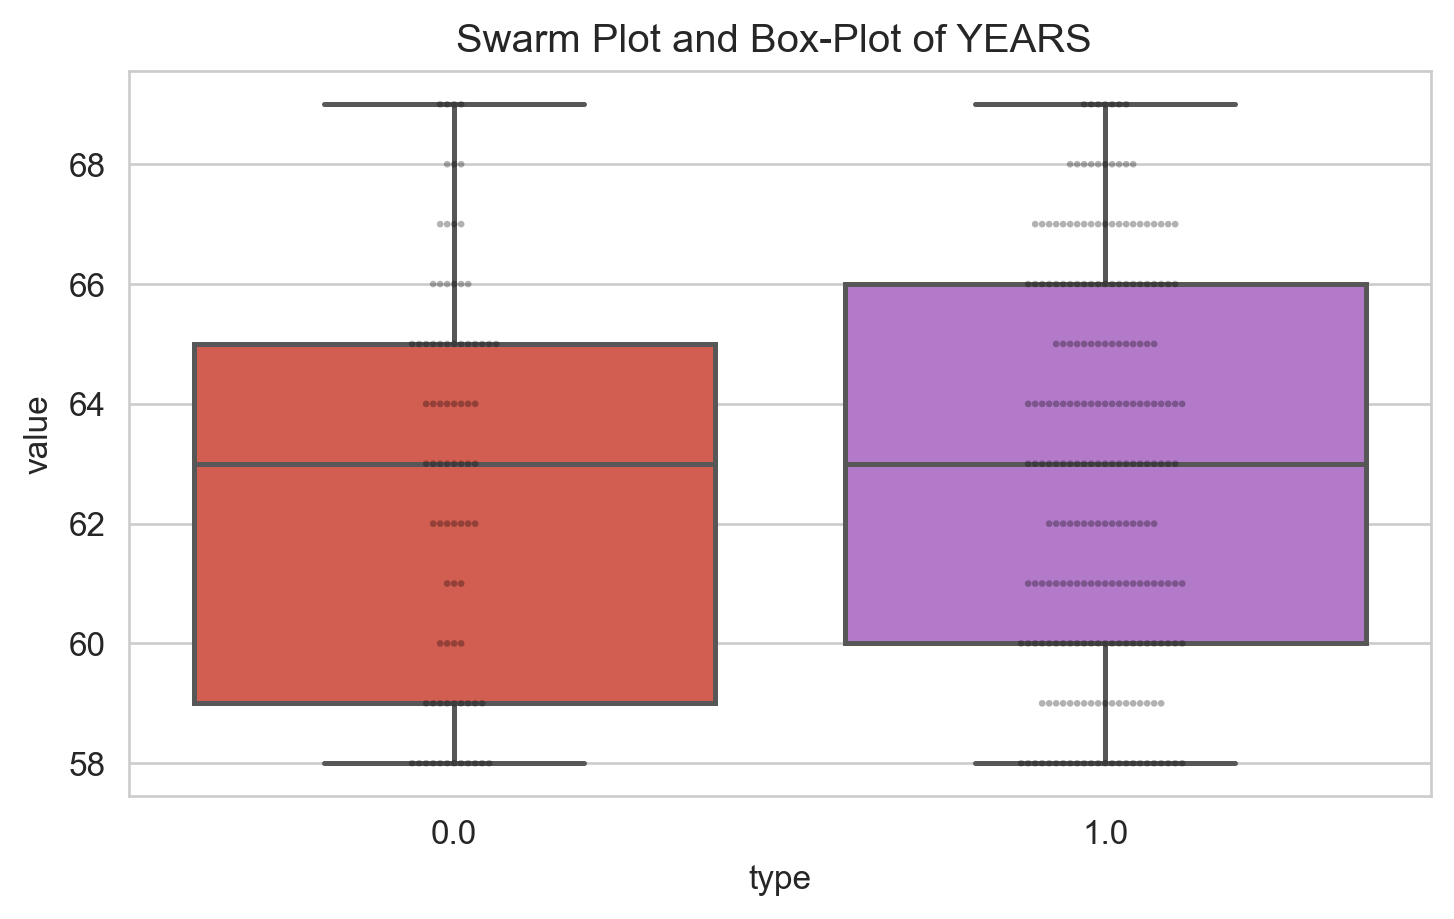

In [22]:
dataset_3 = pd.DataFrame({
    "value": np.concatenate((d1['year'], d2['year'])),
    "type": np.concatenate((np.ones(d1['status'].shape), np.zeros(d2['status'].shape)))
})
sns.boxplot(x="type", y="value", data=dataset_3);
sns.swarmplot(x="type", y="value", data=dataset_3, size=2, color="k", alpha=0.3);
plt.title("Swarm Plot and Box-Plot of YEARS ");

# Voilin Plot

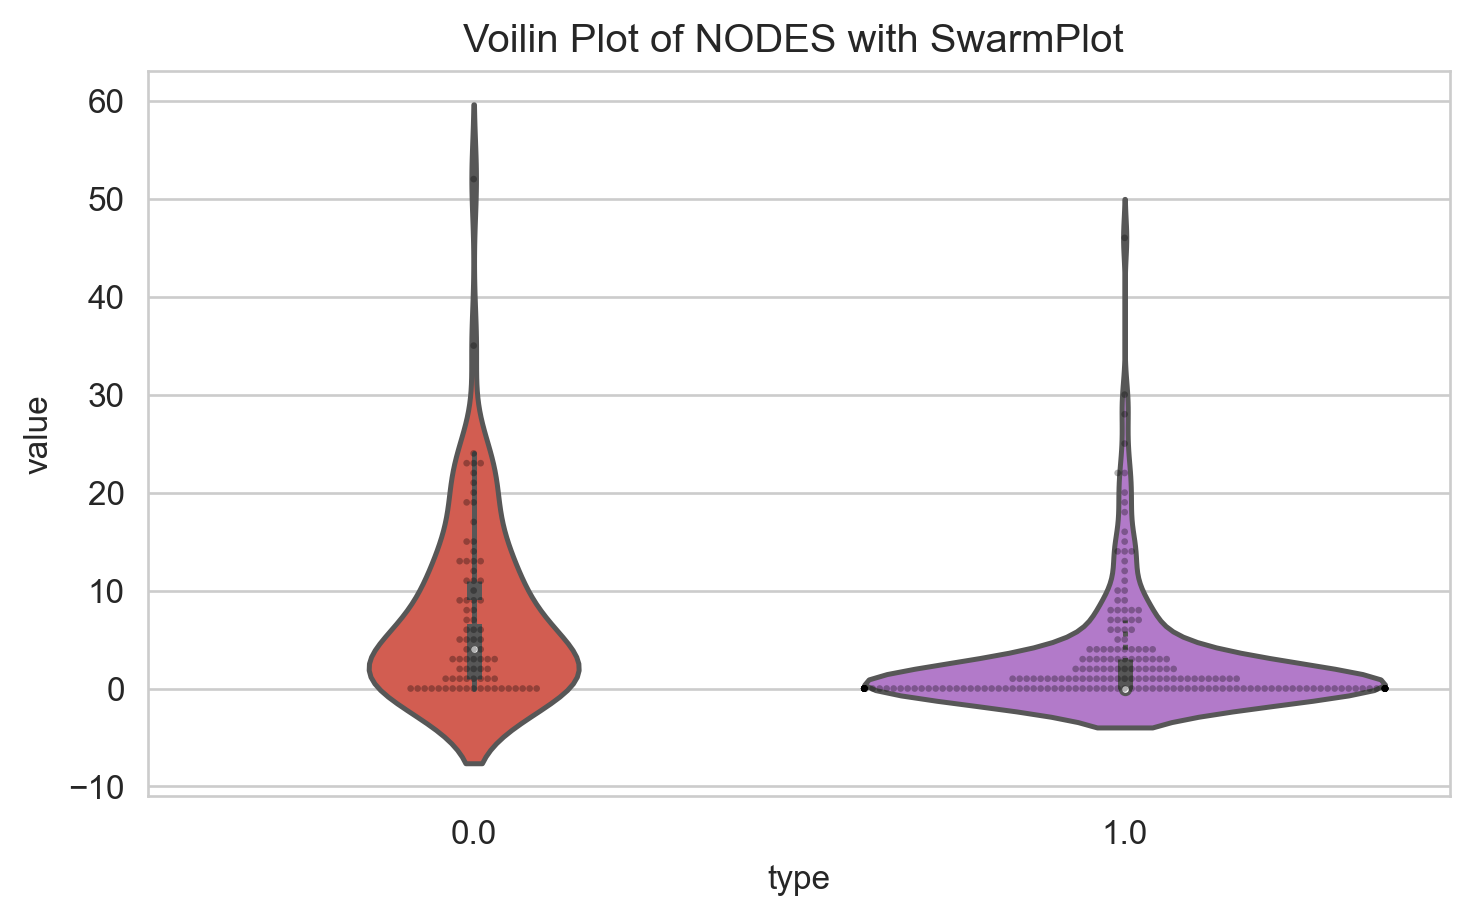

In [23]:
sns.violinplot(x="type", y="value", data=dataset);
sns.swarmplot(x="type", y="value", data=dataset, size=2, color="k", alpha=0.3);
plt.title("Voilin Plot of NODES with SwarmPlot ");

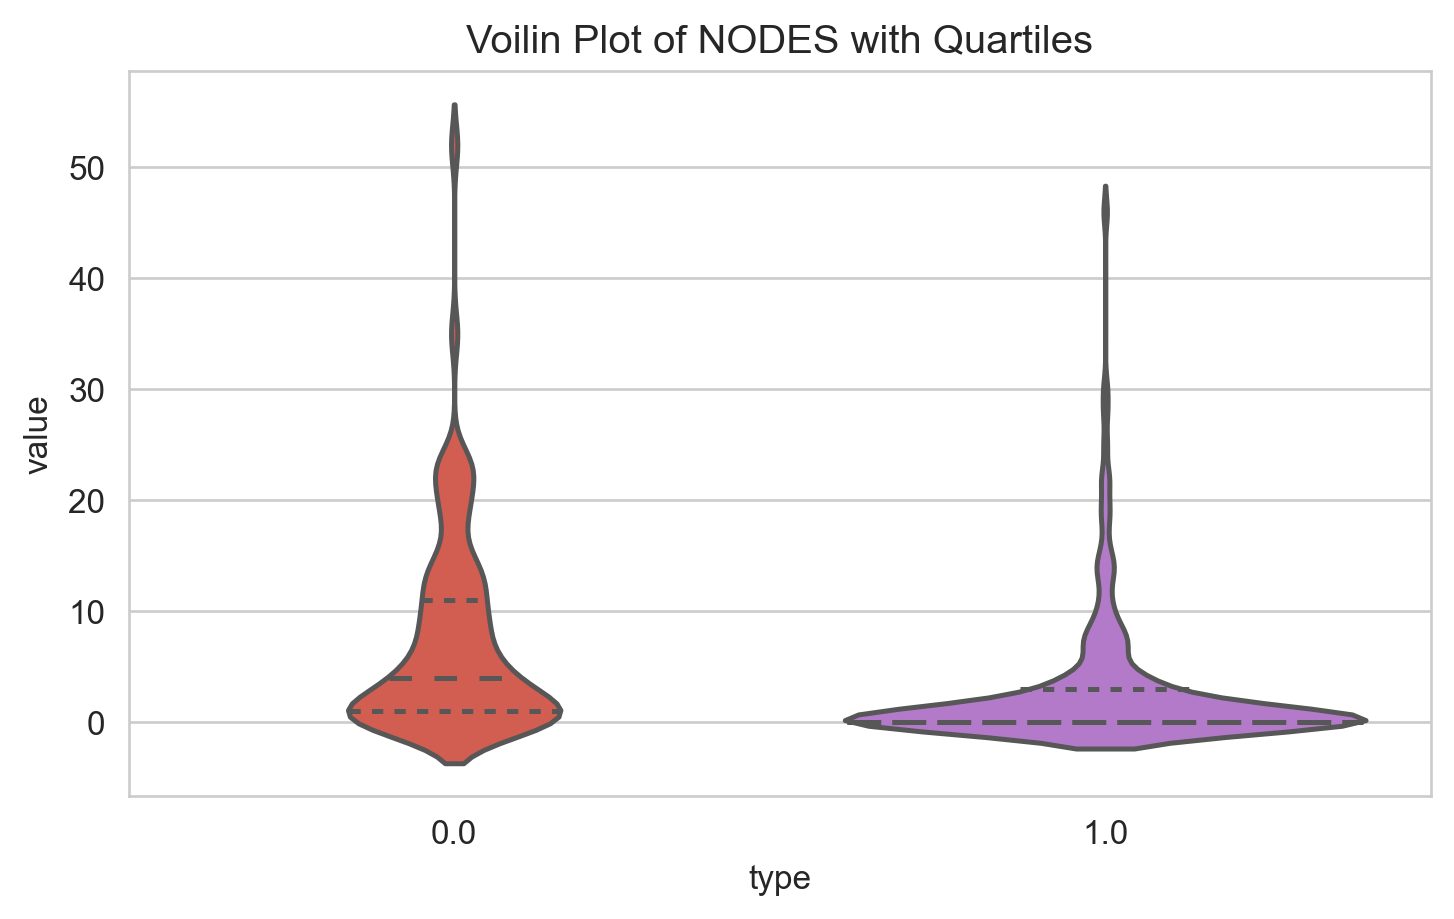

In [24]:
sns.violinplot(x="type", y="value", data=dataset, inner="quartile", bw=0.2);
plt.title("Voilin Plot of NODES with Quartiles");

**Observation**
1. Nodes between 0 to 5 are more likely to survive.
2. Age below 45 are more likely to survive.

# CDF

[0.52       0.14666667 0.06666667 0.05777778 0.04444444 0.00888889
 0.01777778 0.02222222 0.02222222 0.00888889 0.00888889 0.00444444
 0.         0.00444444 0.00444444 0.01333333 0.00444444 0.00444444
 0.         0.00444444 0.00444444 0.00444444 0.         0.00888889
 0.         0.         0.         0.00444444 0.         0.
 0.00444444 0.         0.00444444 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00444444]
[ 0.    0.92  1.84  2.76  3.68  4.6   5.52  6.44  7.36  8.28  9.2  10.12
 11.04 11.96 12.88 13.8  14.72 15.64 16.56 17.48 18.4  19.32 20.24 21.16
 22.08 23.   23.92 24.84 25.76 26.68 27.6  28.52 29.44 30.36 31.28 32.2
 33.12 34.04 34.96 35.88 36.8  37.72 38.64 39.56 40.48 41.4  42.32 43.24
 44.16 45.08 46.  ]
[0.33333333 0.0617284  0.08641975 0.03703704 0.04938272 0.03703704
 0.02469136 0.02469136 0.04938272 0.01234568 0.03703704 0.01234568
 0.04938272 0.01234568 0.02

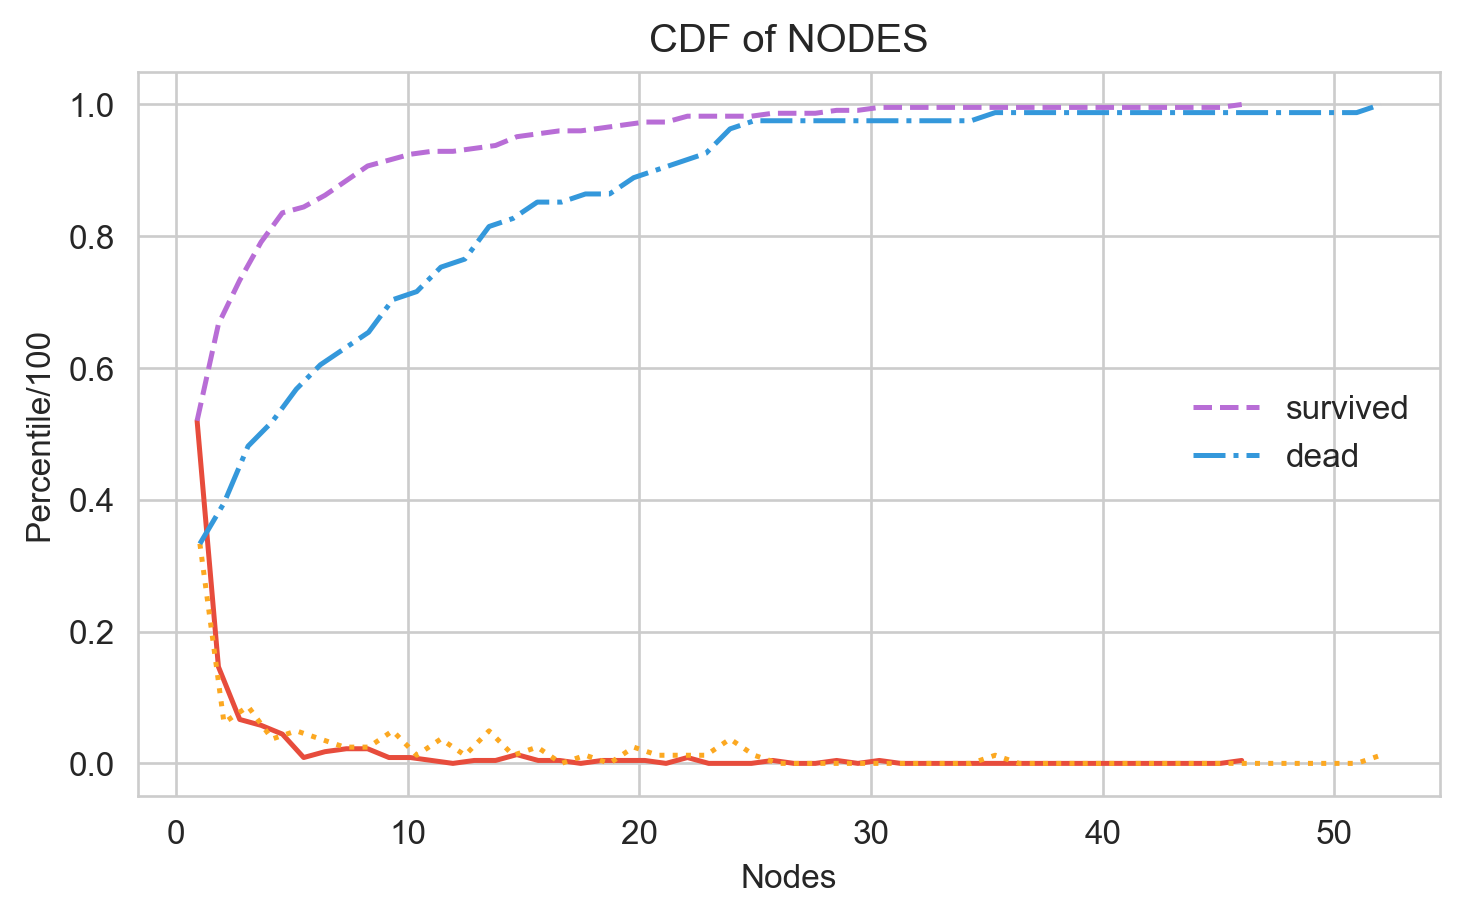

In [25]:
counts, bin_edges = np.histogram(d1['nodes'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="survived")

counts, bin_edges = np.histogram(d2['nodes'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="dead")

#counts, bin_edges = np.histogram(hm_survived['age'], bins=20, 
                                 #density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.legend();
plt.xlabel("Nodes")
plt.ylabel("Percentile/100")
plt.title("CDF of NODES")
plt.show();

[0.01333333 0.00888889 0.         0.00888889 0.02222222 0.00888889
 0.00888889 0.02666667 0.04       0.02222222 0.01333333 0.03111111
 0.03111111 0.03111111 0.01777778 0.02666667 0.         0.01333333
 0.03555556 0.01777778 0.03555556 0.04444444 0.01777778 0.04444444
 0.02222222 0.04       0.03555556 0.02222222 0.03555556 0.03111111
 0.03111111 0.01777778 0.02666667 0.         0.01777778 0.03111111
 0.02222222 0.02666667 0.01333333 0.01777778 0.00888889 0.01333333
 0.02222222 0.00444444 0.01333333 0.00888889 0.00444444 0.00444444
 0.00444444 0.00444444]
[30.   30.94 31.88 32.82 33.76 34.7  35.64 36.58 37.52 38.46 39.4  40.34
 41.28 42.22 43.16 44.1  45.04 45.98 46.92 47.86 48.8  49.74 50.68 51.62
 52.56 53.5  54.44 55.38 56.32 57.26 58.2  59.14 60.08 61.02 61.96 62.9
 63.84 64.78 65.72 66.66 67.6  68.54 69.48 70.42 71.36 72.3  73.24 74.18
 75.12 76.06 77.  ]
[0.02469136 0.         0.         0.         0.01234568 0.01234568
 0.         0.03703704 0.02469136 0.04938272 0.03703704 0.0370

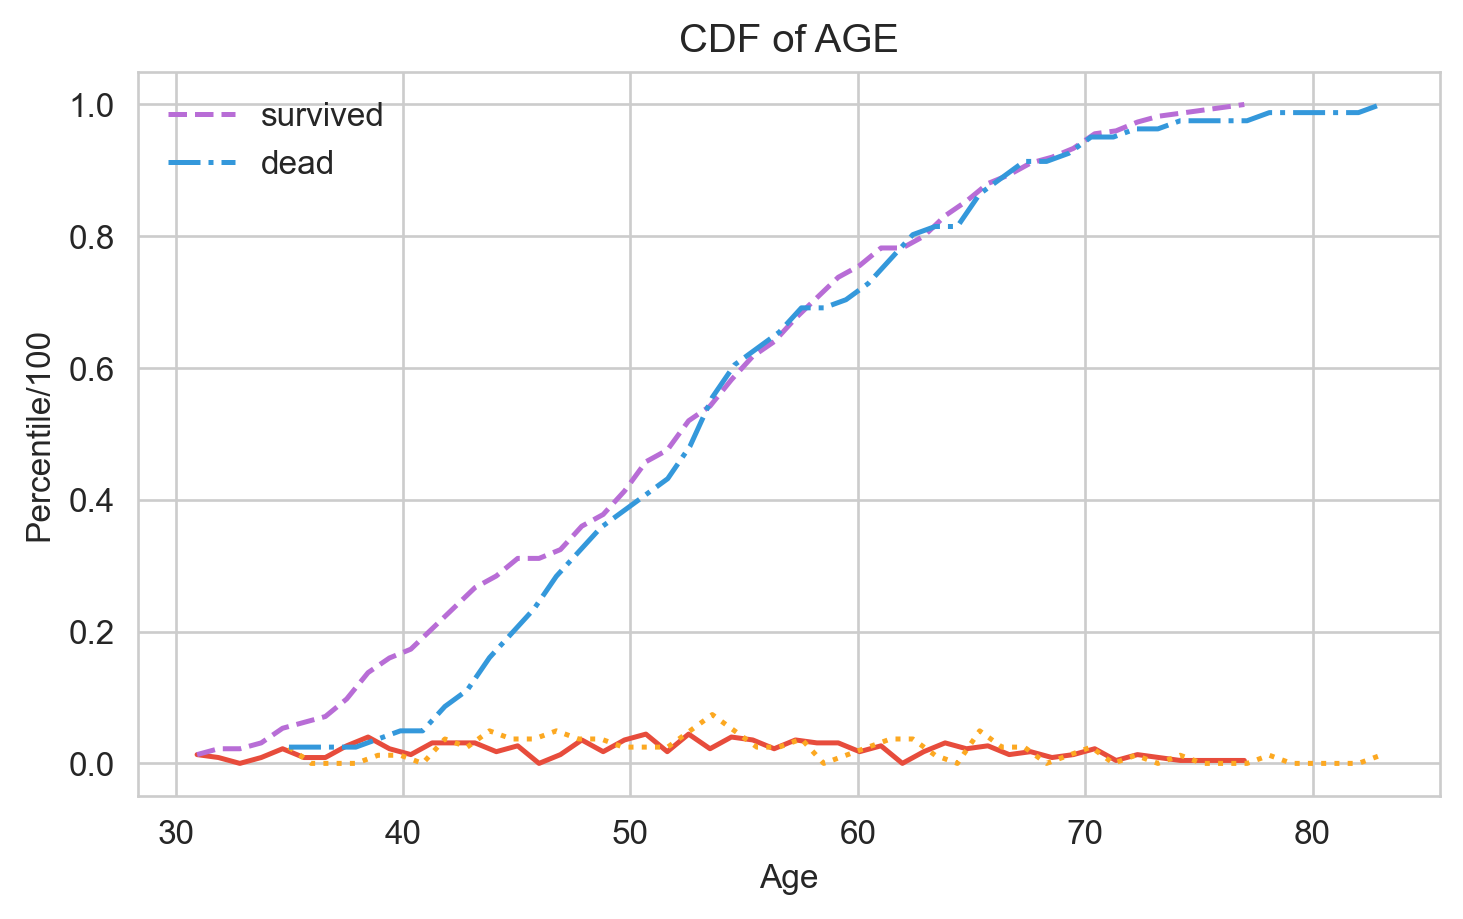

In [26]:
counts, bin_edges = np.histogram(d1['age'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="survived")

counts, bin_edges = np.histogram(d2['age'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="dead")

#counts, bin_edges = np.histogram(hm_survived['age'], bins=20, 
                                 #density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.legend();
plt.xlabel("Age")
plt.ylabel("Percentile/100")
plt.title("CDF of AGE")
plt.show();

[0.10666667 0.         0.         0.         0.08       0.
 0.         0.         0.         0.10666667 0.         0.
 0.         0.10222222 0.         0.         0.         0.
 0.07111111 0.         0.         0.         0.09777778 0.
 0.         0.         0.         0.10222222 0.         0.
 0.         0.06666667 0.         0.         0.         0.
 0.09777778 0.         0.         0.         0.09333333 0.
 0.         0.         0.         0.04444444 0.         0.
 0.         0.03111111]
[58.   58.22 58.44 58.66 58.88 59.1  59.32 59.54 59.76 59.98 60.2  60.42
 60.64 60.86 61.08 61.3  61.52 61.74 61.96 62.18 62.4  62.62 62.84 63.06
 63.28 63.5  63.72 63.94 64.16 64.38 64.6  64.82 65.04 65.26 65.48 65.7
 65.92 66.14 66.36 66.58 66.8  67.02 67.24 67.46 67.68 67.9  68.12 68.34
 68.56 68.78 69.  ]
[0.14814815 0.         0.         0.         0.11111111 0.
 0.         0.         0.         0.04938272 0.         0.
 0.         0.03703704 0.         0.         0.         0.
 0.08641975 0.  

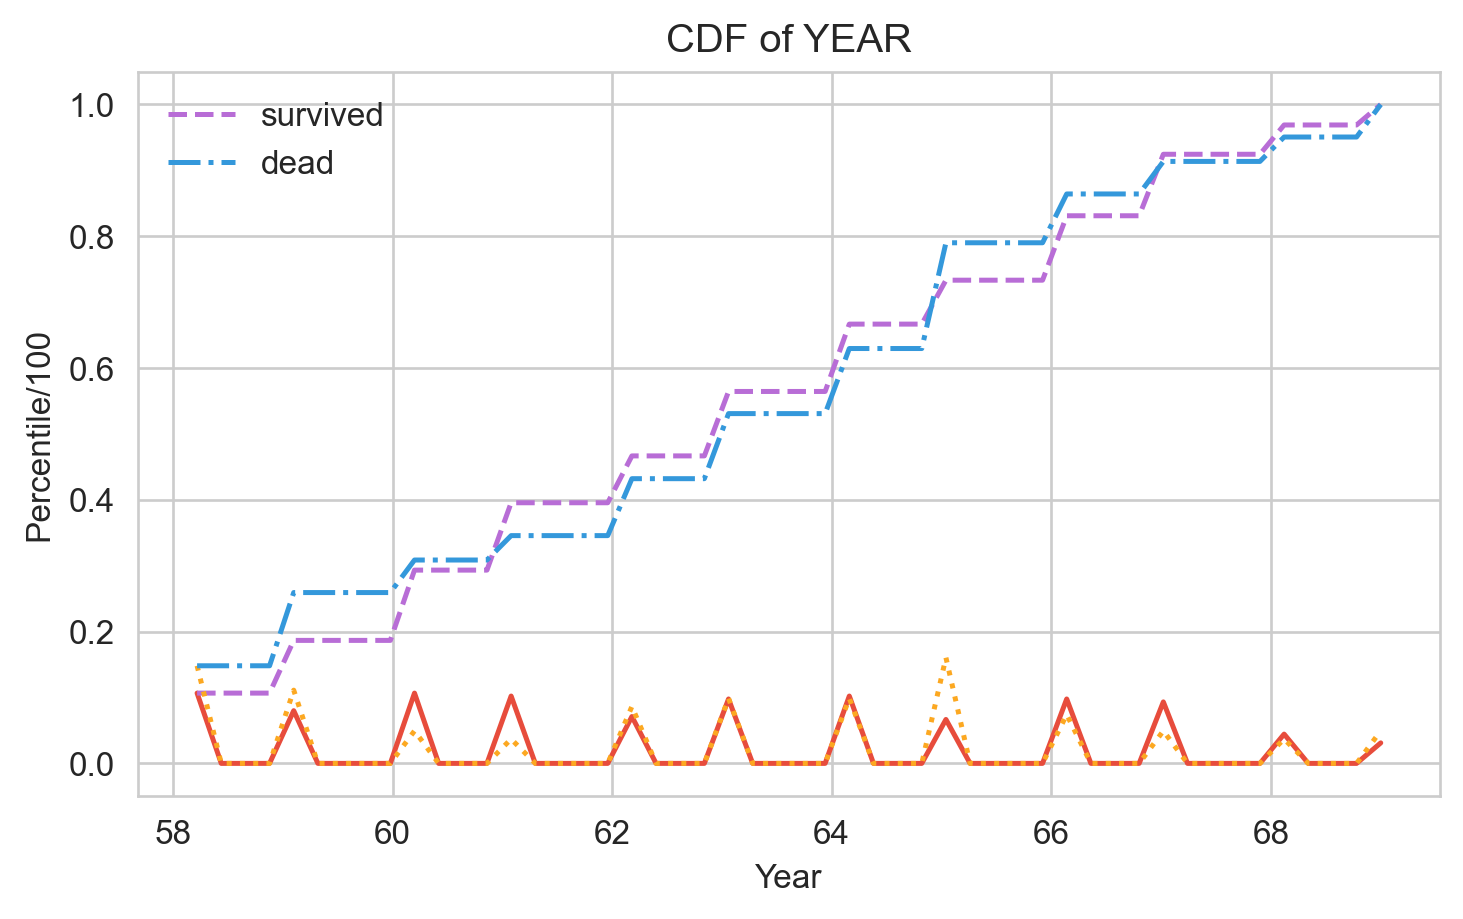

In [27]:
counts, bin_edges = np.histogram(d1['year'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="survived")

counts, bin_edges = np.histogram(d2['year'], bins=50, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label="dead")

#counts, bin_edges = np.histogram(hm_survived['age'], bins=20, 
                                 #density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.legend();
plt.xlabel("Year")
plt.ylabel("Percentile/100")
plt.title("CDF of YEAR")
plt.show();

**Observation**
1. Year < 45 Survived
2. Node <5 Survived

# Scatter Matrix

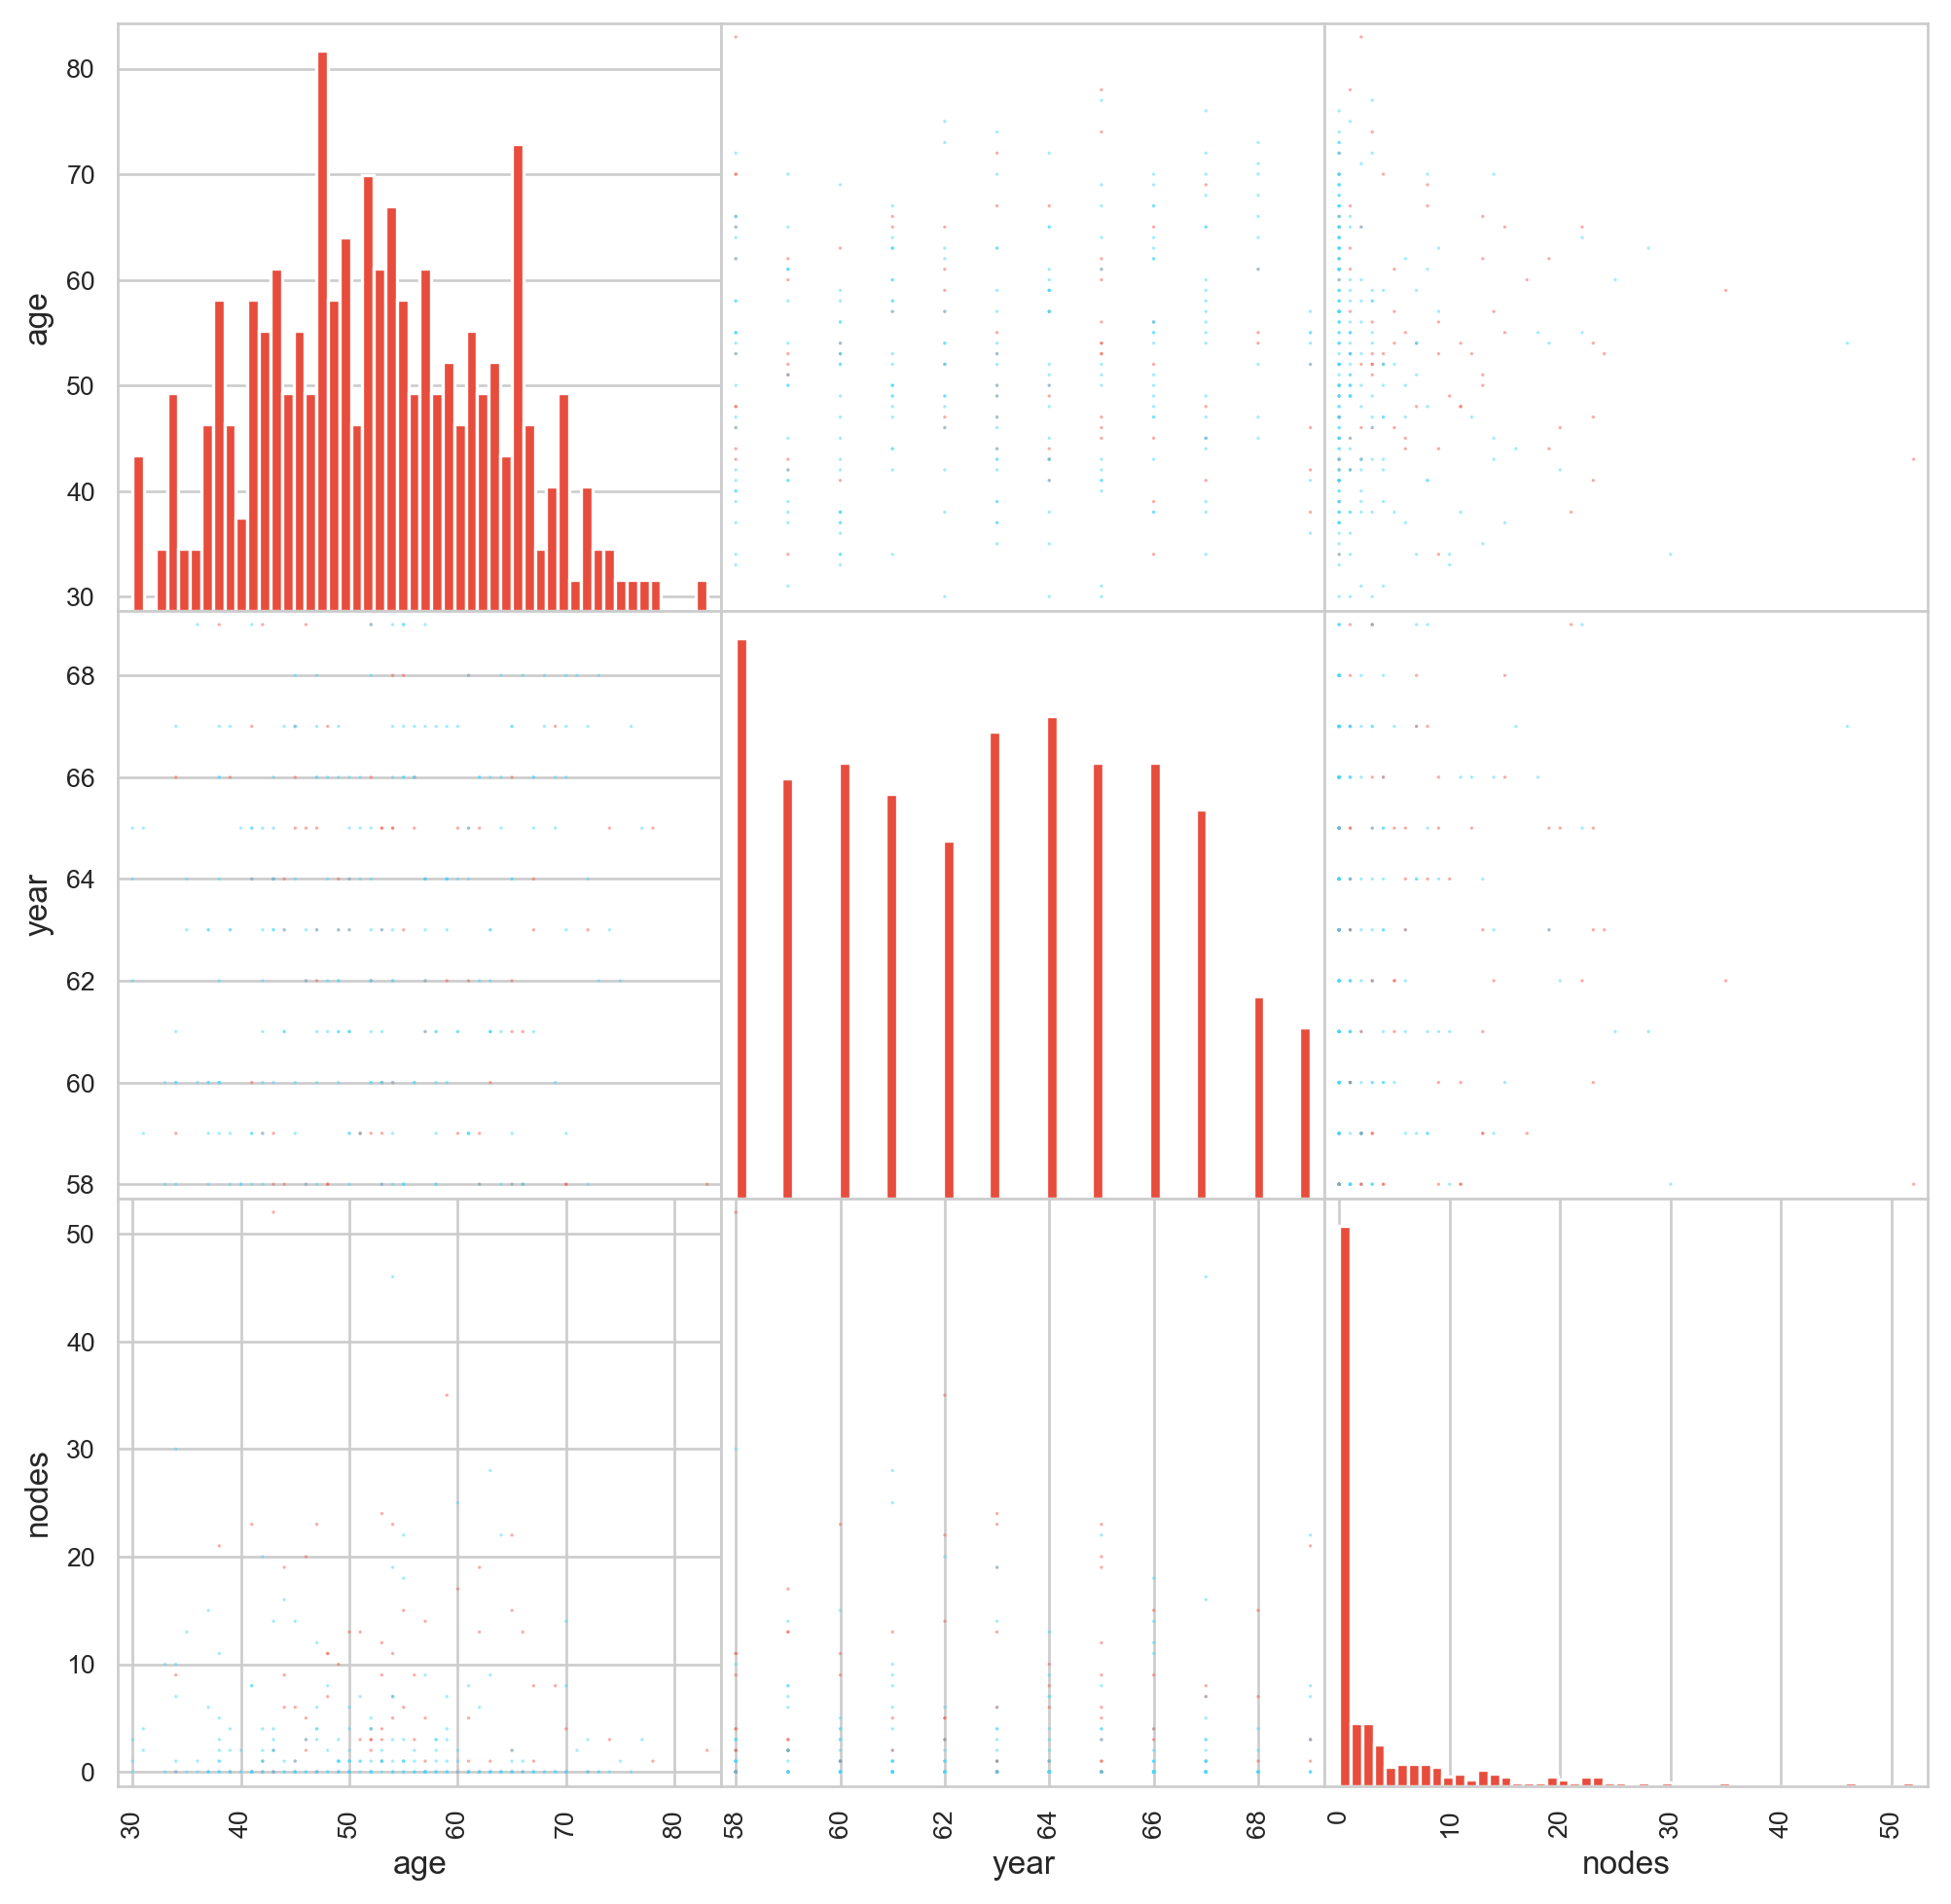

In [28]:
colors = haberman["status"].map(lambda x: "#44d9ff" if (x=='Survive') else "#f95b4a")
pd.plotting.scatter_matrix(haberman, figsize=(10,10), color=colors);

# Correlational Plots
    To easily quantify which variables / attributes are correlated with others!

In [29]:
haberman.corr()

,age,year,nodes
age,1.000000,0.089529,-0.063176
year,0.089529,1.000000,-0.003764
nodes,-0.063176,-0.003764,1.000000


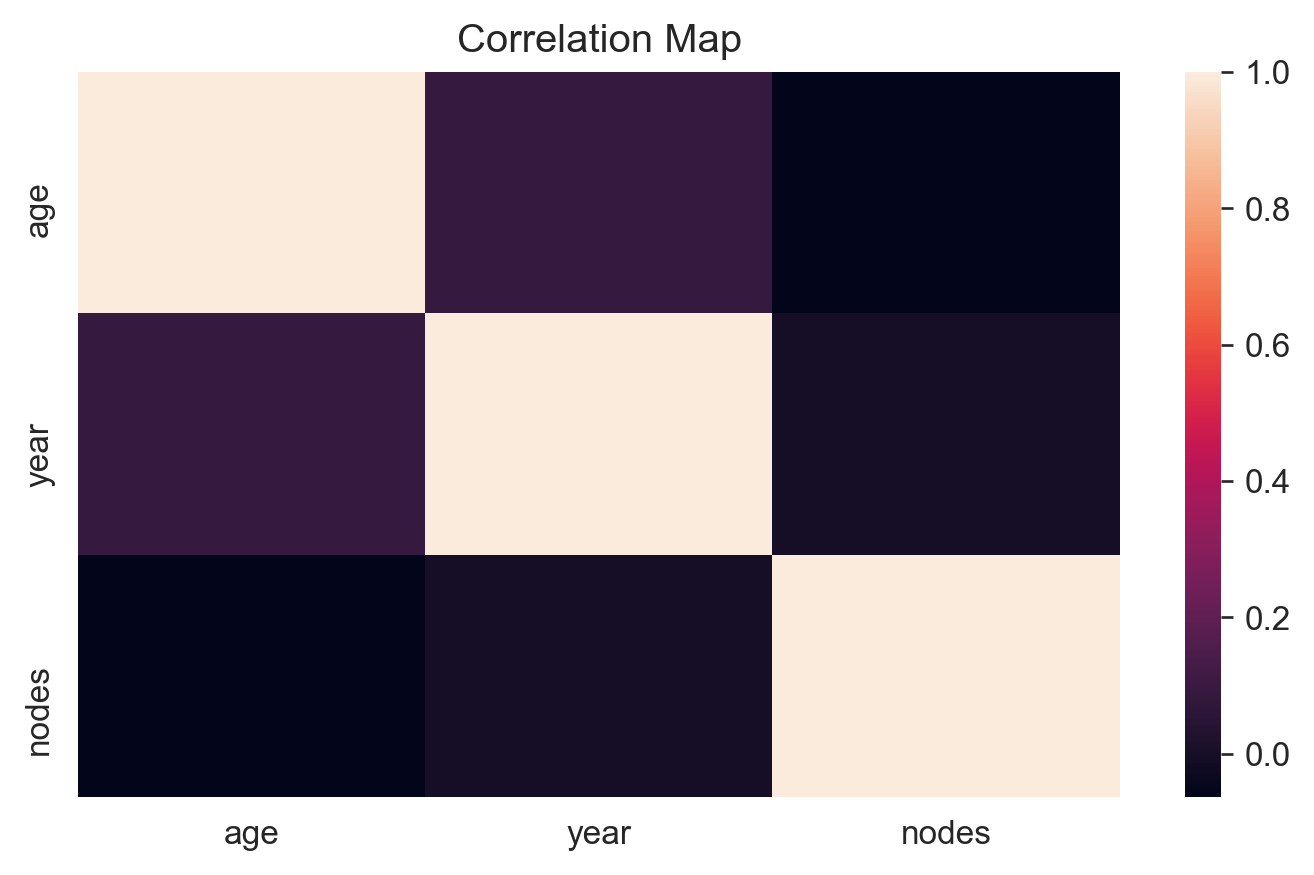

In [30]:
sns.heatmap(haberman.corr());
plt.title("Correlation Map");

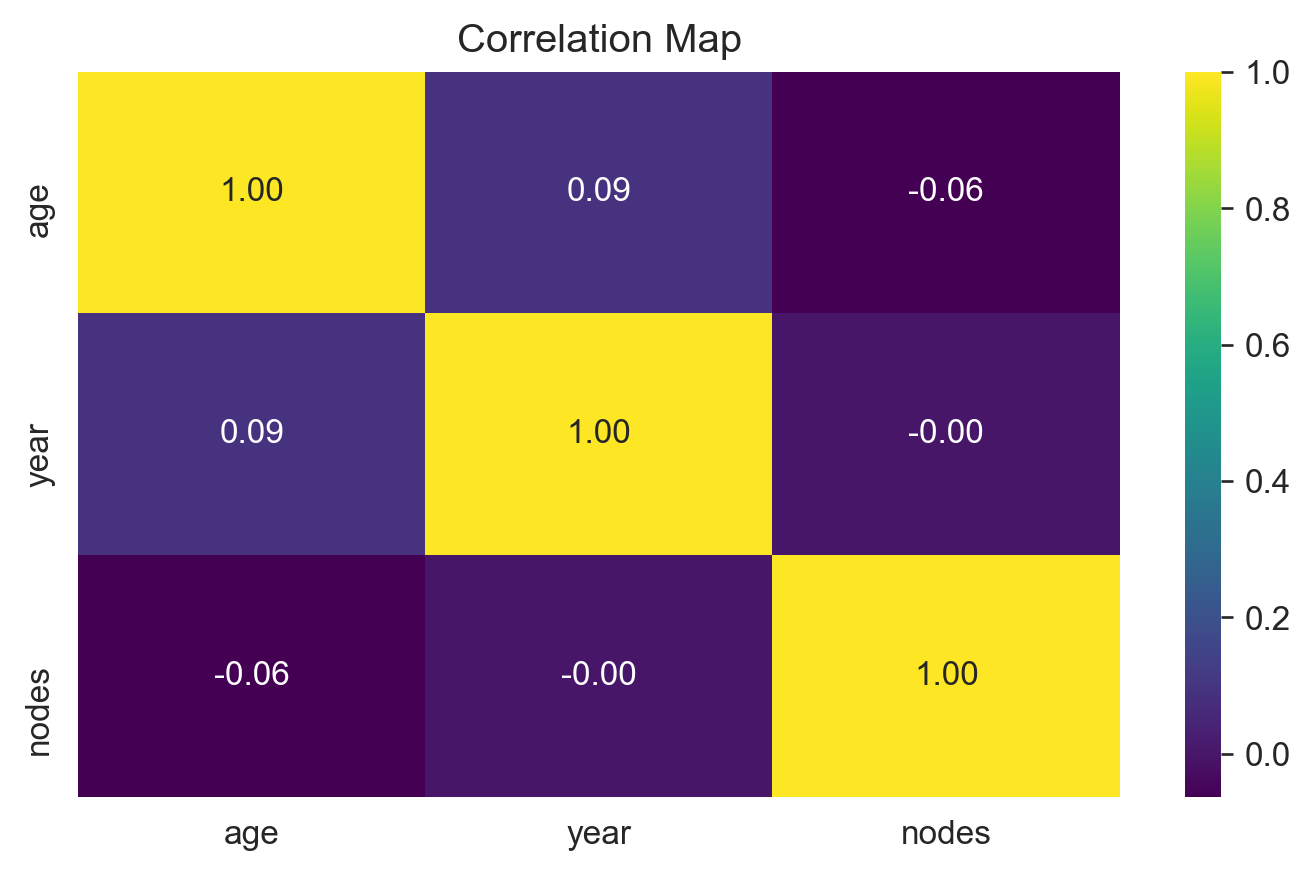

In [31]:
sns.heatmap(haberman.corr(), annot=True, cmap="viridis", fmt="0.2f");
plt.title("Correlation Map");

# 2-D Histogram

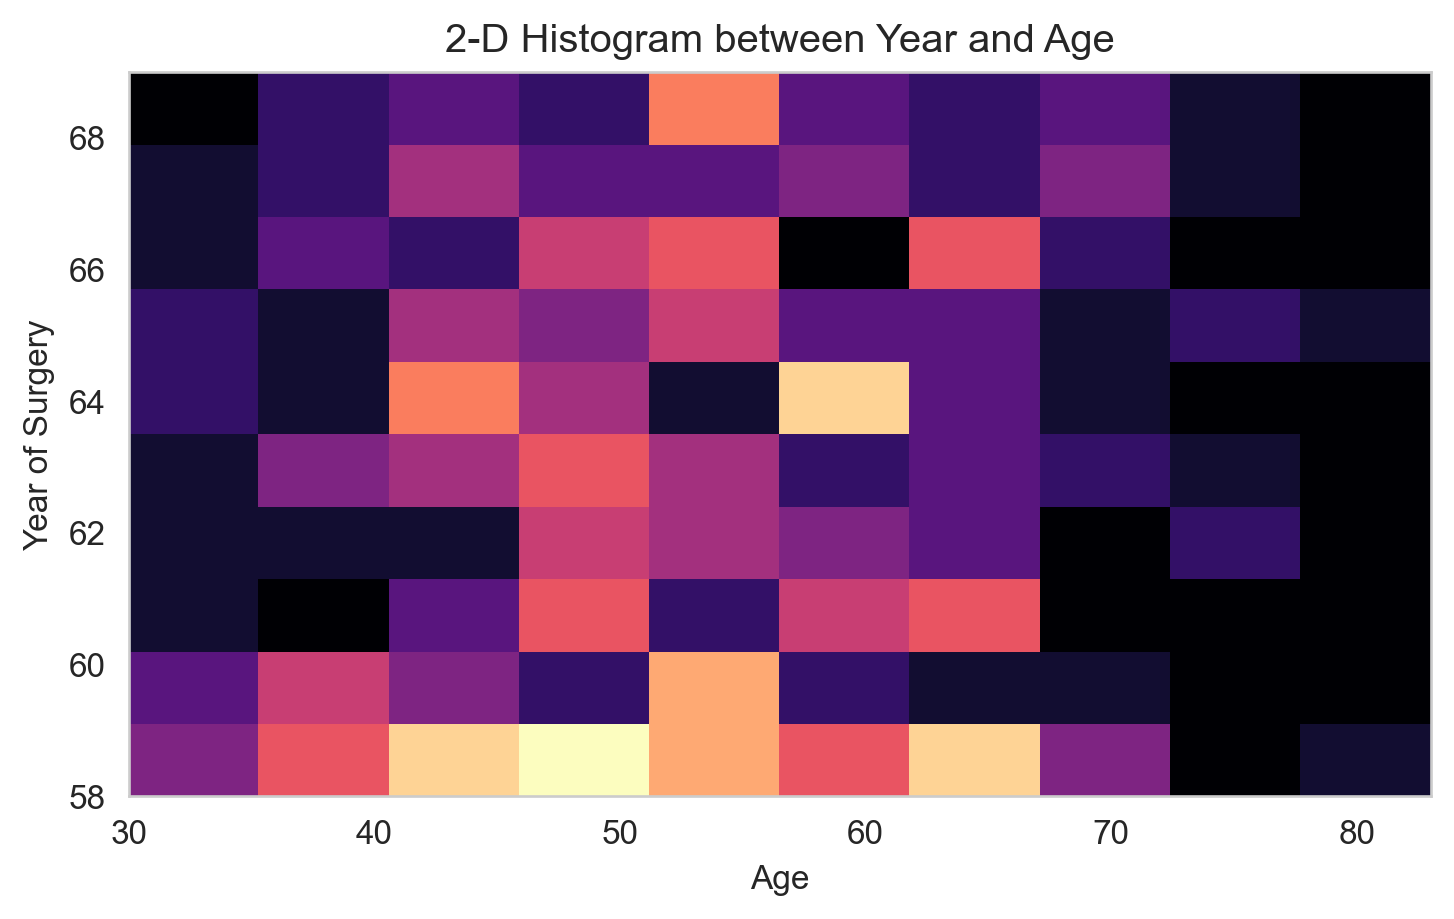

In [32]:
plt.hist2d(haberman["age"], haberman["year"], bins=10, cmap="magma")
plt.xlabel("Age")
plt.ylabel("Year of Surgery");
plt.title("2-D Histogram between Year and Age");

**Obeservation**
1. Not much data. Too much noise if we increase BIN size

# Contour Plots

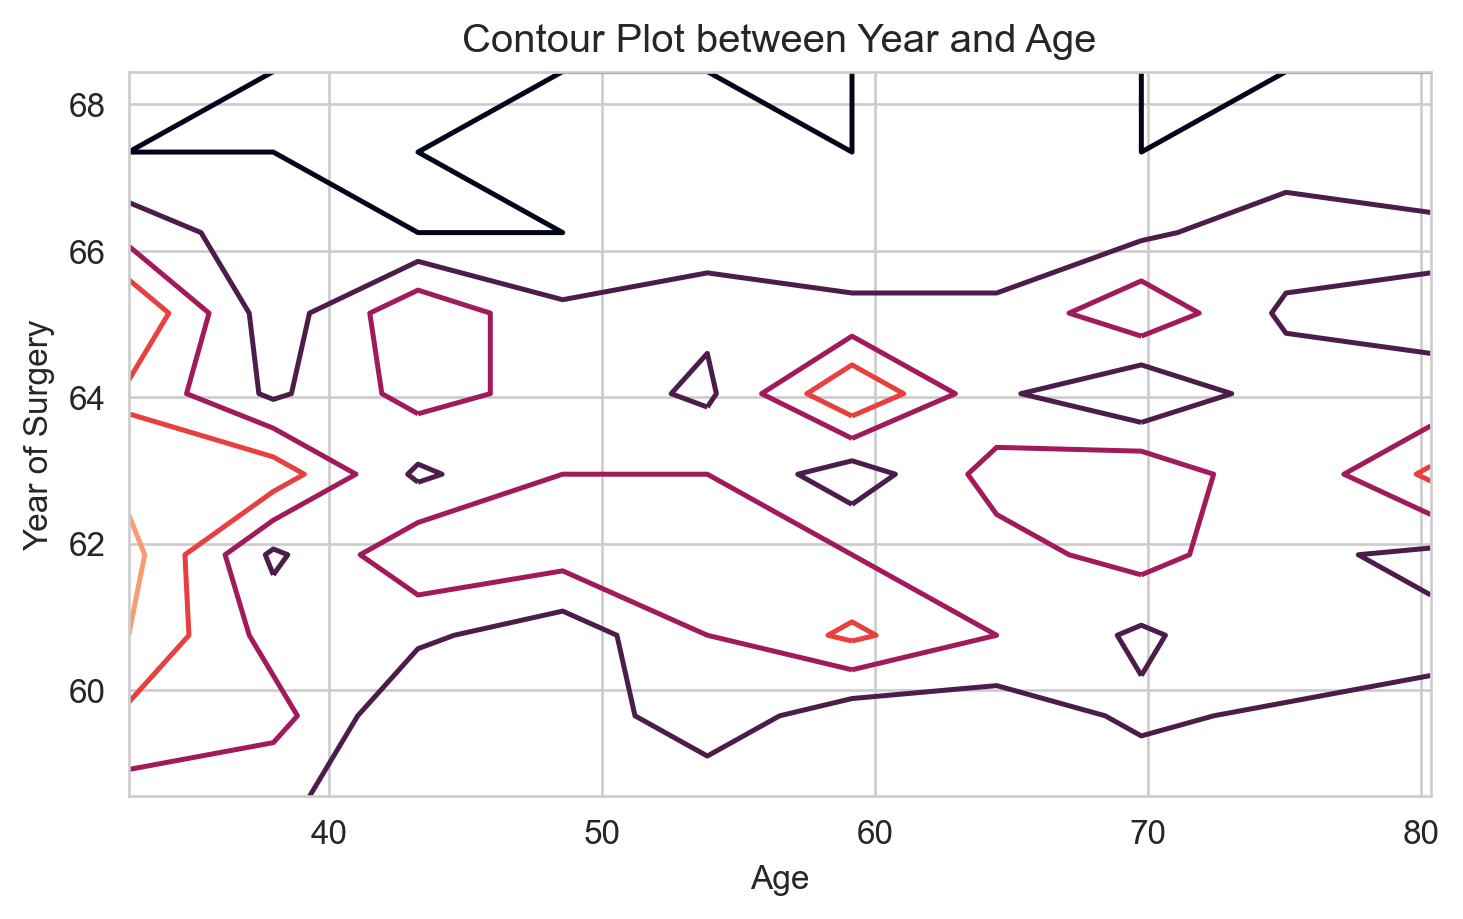

In [33]:
hist, x_edge, y_edge = np.histogram2d(haberman["age"], haberman["year"], bins=10)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=4)
plt.xlabel("Age")
plt.ylabel("Year of Surgery");
plt.title("Contour Plot between Year and Age");

# KDE Plots

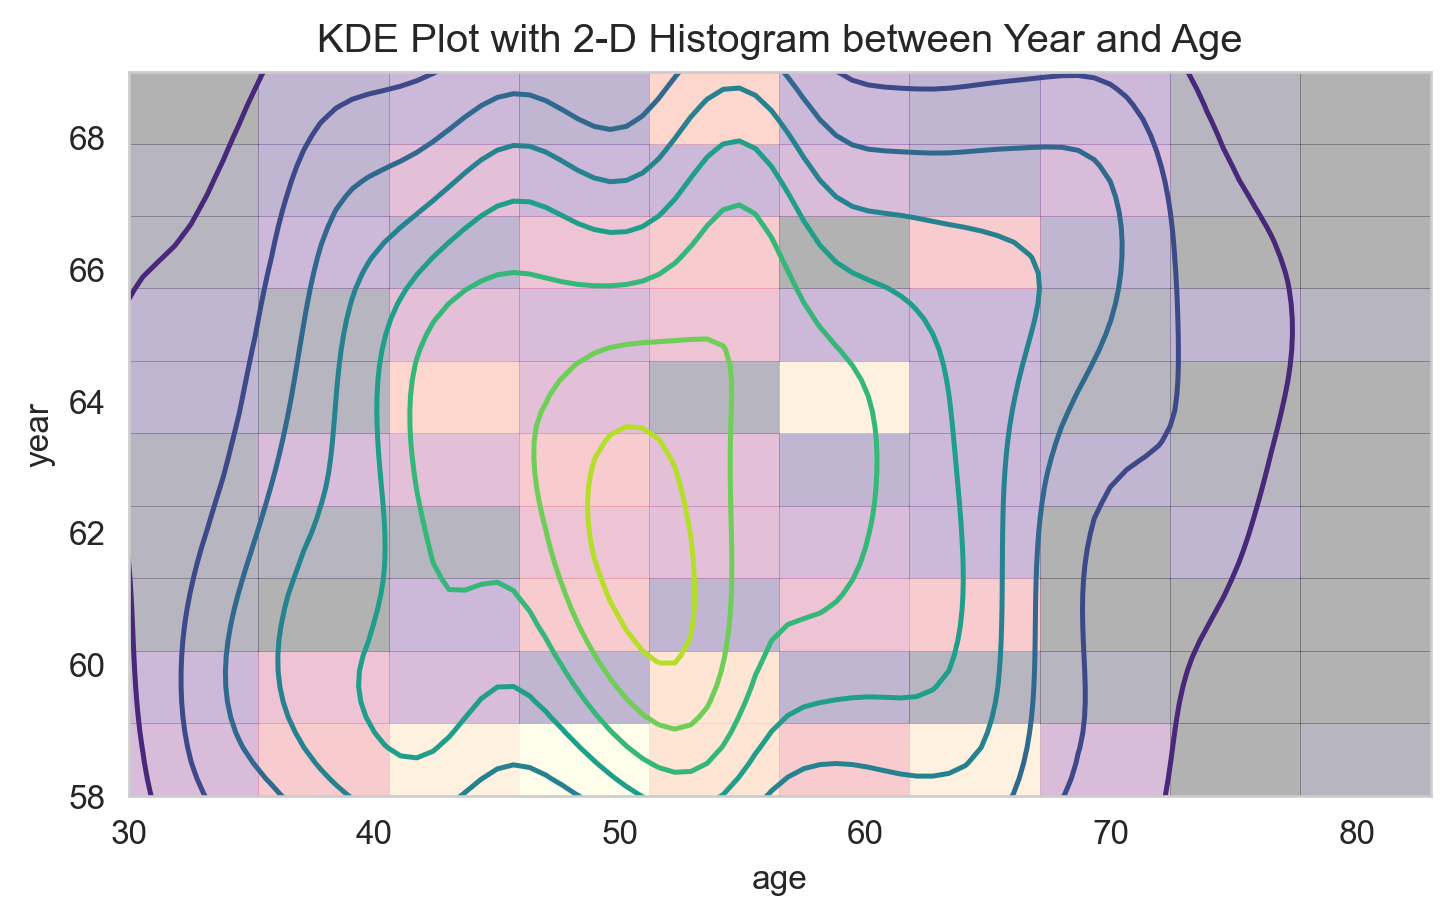

In [34]:
sns.kdeplot(haberman["age"], haberman["year"], cmap="viridis", bw=(2, 2));
plt.hist2d(haberman["age"], haberman["year"], bins=10, cmap="magma", alpha=0.3);
plt.title("KDE Plot with 2-D Histogram between Year and Age");

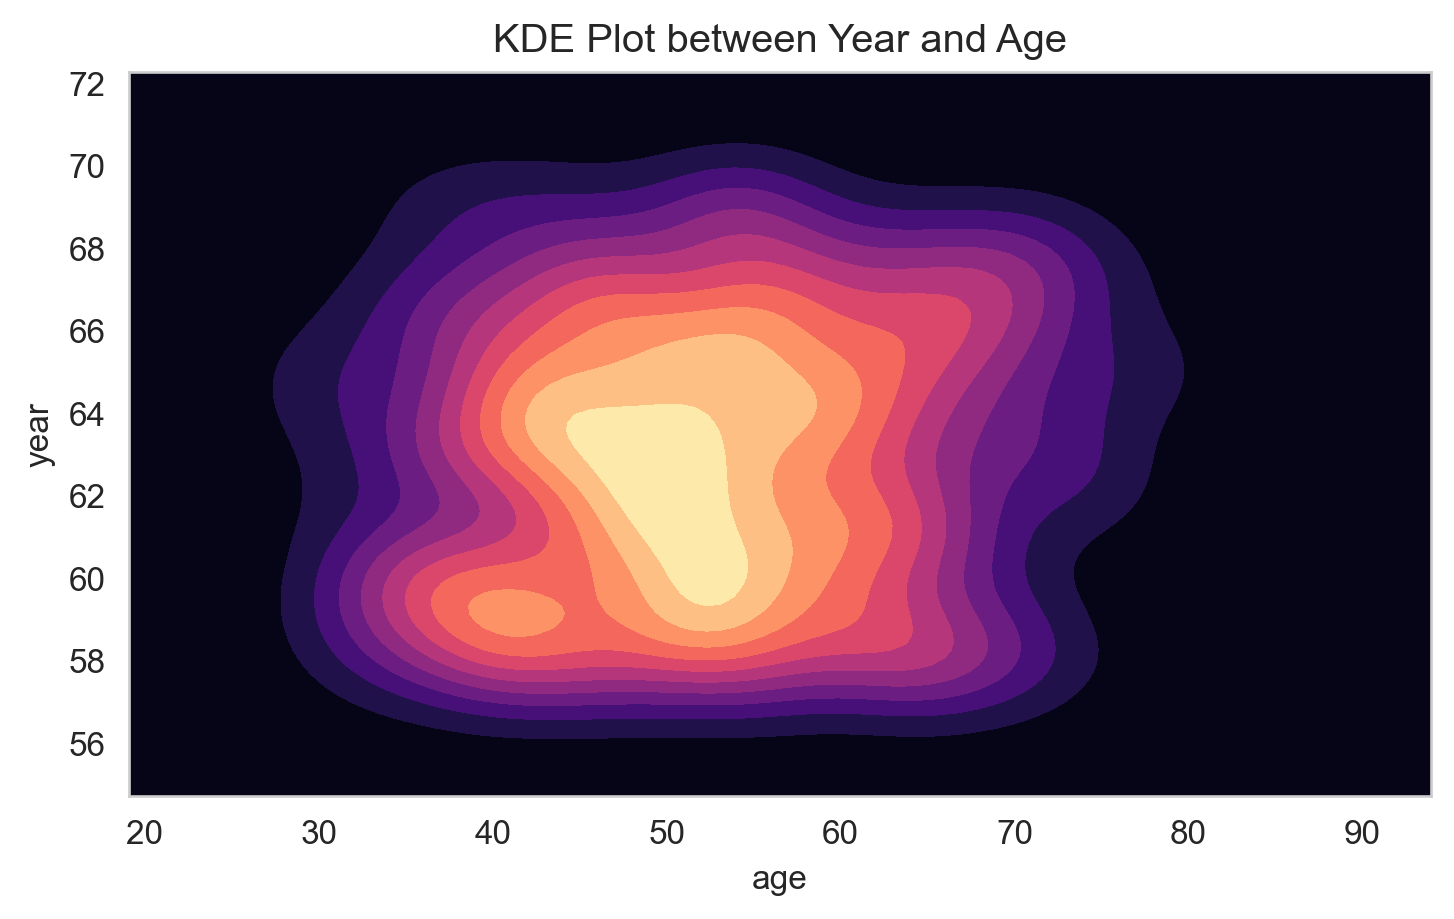

In [35]:
sns.kdeplot(haberman["age"], haberman["year"], cmap="magma", shade=True);
plt.title("KDE Plot between Year and Age");

Nothing much can be inferred because to much noise(less-data).